In [1]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which p arts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

from IPython.display import clear_output

import numpy as np

from PIL import ImageFont
from PIL import Image, ImageDraw
from PIL import ImageColor

from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

import random

import time
import shutil
import uuid
from shutil import copyfile
from collections import Counter

In [2]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

def show( img, name= 'noname'):
  plt.imshow( img)
  plt.title( name)
  plt.show()

def show_gimage( img, name= 'noname'):
  plt.imshow( img, cmap= 'gray')
  plt.title( name)
  plt.show()

def _load_image( path):
  # return cv2.imread( path, cv2.IMREAD_GRAYSCALE)
  return cv2.imread( path)
  
def write_image( path, img):
  cv2.imwrite( path, img)

# def resize( img, scale_percent= 60, verbose=False):
#   #scale_percent = 60 # percent of original size
#   width = int(img.shape[1] * scale_percent / 100)
#   height = int(img.shape[0] * scale_percent / 100)
#   dim = (width, height)
#   if verbose:
#     print( "scale", scale_percent)
#     print( "dim", dim)
#   # resize image
#   return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

In [ ]:
#orig_imgdir= 'C:/mestrado/datasets/handmade/imagens-originais/paired-part5-/images_with_header'
orig_imgdir= 'C:/mestrado/datasets/final/handmade/images_with_header'
dest_imgdir= 'C:/mestrado/datasets/final/parts-lib/from-handmade'
files= glob( os.path.join( orig_imgdir, "*.jpg"))

In [ ]:
len( files)

In [ ]:
str( uuid.uuid4())[:6]

In [4]:
words= ['Ba4', 'Ba5', 'Ba7', 'Bb2', 'Bb3', 'Bb4', 'Bb4+', 'Bb5', 'Bb5+', 'Bb7', 'Bc4', 'Bc5', 'Bd2', 'Bd3', 'Bd6', 'Bd7', 'Be2', 'Be3', 'Be5', 'Be6', 'Be7', 'Bf3', 'Bf4', 'Bf5', 'Bg2', 'Bg3', 'Bg4', 'Bg5', 'Bg7', 'Bh4', 'Bh6', 'Bh7', 'Bxb4', 'Bxc3', 'Bxc3+', 'Bxc4', 'Bxc5', 'Bxc6', 'Bxc7', 'Bxd2+', 'Bxd6', 'Bxd7+', 'Bxf6', 'Kd8', 'Kxd8', 'Na4', 'Na5', 'Na6', 'Nb3', 'Nb4', 'Nb5', 'Nb6', 'Nbd2', 'Nbd7', 'Nbxd2', 'Nc2', 'Nc3', 'Nc5', 'Nc6', 'Nce7', 'Nd2', 'Nd4', 'Nd5', 'Nd6+', 'Nd7', 'Ndb5', 'Nde2', 'Ne1', 'Ne2', 'Ne4', 'Ne5', 'Ne7', 'Nf1', 'Nf3', 'Nf6', 'Nfd7', 'Ng5', 'Nge2', 'Nge7', 'Ngf3', 'Ngf6', 'Nh5', 'Nxc6', 'Nxd4', 'Nxd5', 'Nxd7', 'Nxe4', 'Nxe5', 'Nxf6+', 'O-O', 'O-O-O', 'Qa4', 'Qa5', 'Qa5+', 'Qb3', 'Qb6', 'Qc2', 'Qc3', 'Qc7', 'Qd1', 'Qd2', 'Qd3', 'Qd4', 'Qd5', 'Qd6', 'Qd7', 'Qe1', 'Qe2', 'Qe7', 'Qe8', 'Qf3', 'Qf6', 'Qg6', 'Qh4', 'Qxb2', 'Qxb3', 'Qxc4', 'Qxc7', 'Qxd4', 'Qxd5', 'Qxd6', 'Qxd8+', 'Qxe4+', 'Qxf6', 'Rb1', 'Rb8', 'Rc8', 'Re1', 'Re8', 'a3', 'a4', 'a5', 'a6', 'b3', 'b4', 'b5', 'b6', 'bxc3', 'bxc6', 'c3', 'c4', 'c5', 'c6', 'cxb3', 'cxd4', 'cxd5', 'cxd6', 'd3', 'd4', 'd5', 'd6', 'dxc3', 'dxc4', 'dxc5', 'dxc6', 'dxe4', 'e3', 'e4', 'e5', 'e6', 'exd4', 'exd5', 'exf6', 'f3', 'f4', 'f5', 'f6', 'g3', 'g5', 'g6', 'gxf6', 'h3', 'h4', 'h5', 'h6']

In [385]:
len( words)

175

In [389]:
", ".join( [pgn_to_pt(w) for w in words])

'Ba4, Ba5, Ba7, Bb2, Bb3, Bb4, Bb4+, Bb5, Bb5+, Bb7, Bc4, Bc5, Bd2, Bd3, Bd6, Bd7, Be2, Be3, Be5, Be6, Be7, Bf3, Bf4, Bf5, Bg2, Bg3, Bg4, Bg5, Bg7, Bh4, Bh6, Bh7, Bxb4, Bxc3, Bxc3+, Bxc4, Bxc5, Bxc6, Bxc7, Bxd2+, Bxd6, Bxd7+, Bxf6, Rd8, Rxd8, Ca4, Ca5, Ca6, Cb3, Cb4, Cb5, Cb6, Cbd2, Cbd7, Cbxd2, Cc2, Cc3, Cc5, Cc6, Cce7, Cd2, Cd4, Cd5, Cd6+, Cd7, Cdb5, Cde2, Ce1, Ce2, Ce4, Ce5, Ce7, Cf1, Cf3, Cf6, Cfd7, Cg5, Cge2, Cge7, Cgf3, Cgf6, Ch5, Cxc6, Cxd4, Cxd5, Cxd7, Cxe4, Cxe5, Cxf6+, O-O, O-O-O, Da4, Da5, Da5+, Db3, Db6, Dc2, Dc3, Dc7, Dd1, Dd2, Dd3, Dd4, Dd5, Dd6, Dd7, De1, De2, De7, De8, Df3, Df6, Dg6, Dh4, Dxb2, Dxb3, Dxc4, Dxc7, Dxd4, Dxd5, Dxd6, Dxd8+, Dxe4+, Dxf6, Tb1, Tb8, Tc8, Te1, Te8, a3, a4, a5, a6, b3, b4, b5, b6, bxc3, bxc6, c3, c4, c5, c6, cxb3, cxd4, cxd5, cxd6, d3, d4, d5, d6, dxc3, dxc4, dxc5, dxc6, dxe4, e3, e4, e5, e6, exd4, exd5, exf6, f3, f4, f5, f6, g3, g5, g6, gxf6, h3, h4, h5, h6'

In [ ]:
# #
# # reduz words a top10
# #
# random.shuffle( words)


In [ ]:
# words= words[:16]

In [ ]:
words

In [5]:
#
# recorta a imagem em partes a partir da base de manuscritos..
#
def save_cuts( labels, cuts):
    
    for i in range( 0, len( cuts)):

        label= labels[i].replace( '...', '___')
        folder= os.path.join( dest_imgdir, label)
        
        Path(folder).mkdir(parents=True, exist_ok=True)
        fname= label+"_"+ str( uuid.uuid4())[:8]+'.jpg'
#         print( 'save to ', fname)
        write_image( os.path.join( folder, fname), cuts[i])
        

def showsmall( img, name= 'noname'):
    plt.figure(figsize = (4,6))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
                    
def showbig( img, name= 'noname'):
    plt.figure(figsize = (10,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
    
def crop_only( img, y, h, x, w):
    y= max( y, 0)
    x= max( x, 0)
#     print( '>', y, h, x, w)
    crop_img= img[ y:y+h, x:x+w]
    return crop_img


def get_cut_for( i, col_img):
    img= col_img[0] if i%2== 0 else col_img[1]

    h= 69.72
    ln= int( i/2)
    margin_h= 5
    shift_h= 12
    y= int( ln* h)+ shift_h
    return crop_only( img, y-margin_h, int(h+2*margin_h), 0, img.shape[1])


def generate_parts(_files):
    # w= 335 
    w= 320 
    count= 0
    for f in _files:
        # trim
    #     clear_output()
        if count%10== 0:
            print( count)
        count+= 1

    #     clear_output()
        img= cv2.imread( f)
#         show( img)

        labels= read_label( os.path.join( 'C:/mestrado/datasets/final/handmade/labels',
                                        Path( f).name.replace( '.jpg', '.pgn')
                                        ))

#         print( labels)

        img1= img[504:,:]
#         img2= np.concatenate((
#             img1[:, 3:(3+w)],
#             img1[:, 435:(435+w)],
#             img1[:, 772:(772+w)],
#             img1[:, 1200:(1200+w)]
#         ), axis= 1)
#         showsmall( img1[:, 5:(5+w)])
#         showsmall( img1[:, 435:(435+w)])
#         showsmall( img1[:, 772:(772+w)])
#         showsmall( img1[:, 1200:(1200+w)])

        img_1= img1[:, 5:(5+w)]
        img_2= img1[:, 435:(435+w)]
#         img_3= img1[:, 772:(772+w)]
#         img_4= img1[:, 1200:(1200+w)]


#         showsmall(img_1)
#         showsmall(img_2)
        pgn= labels.split()
        col_img= [img_1, img_2]
        cuts= []
        labels= []
        for i in range( 0, min( 50, len( pgn))):
            if pgn[i] in words:
                img_cut= get_cut_for( i, col_img)
#                 showsmall( img_cut, pgn[i])

                cuts.append( img_cut)
                labels.append( pgn[i])
            
        save_cuts( labels, cuts)

    #     m= input()    
    #     img3= cv2.resize(img2, (678, 900), interpolation = cv2.INTER_AREA)  
    #     img3= img2
    #     to_file= os.path.join( dest_imgdir, Path( f).name)
    #     print( 'save to ', to_file)
    #     write_image( to_file, img3)

# generate_parts( files[0:1])

In [ ]:
#
# gera 8 linhas de handmade
#


In [ ]:
#orig_imgdir= 'C:/mestrado/datasets/handmade/imagens-originais/paired-part5-/images_with_header'
orig_imgdir= 'C:/mestrado/datasets/final/handmade/images_with_header'
dest_imgdir= 'C:/mestrado/datasets/final/handmade-8lines'
files= glob( os.path.join( orig_imgdir, "*.jpg"))

In [ ]:
len( files)

In [6]:

#
# recorta a imagem em partes a partir da base de manuscritos..
#
# def save_cuts( labels, cuts):
    
#     for i in range( 0, len( cuts)):
#         label= labels[i].replace( '...', '___')
#         folder= os.path.join( dest_imgdir, label)
        
#         Path(folder).mkdir(parents=True, exist_ok=True)
#         fname= label+"_"+ str( uuid.uuid4())[:8]+'.jpg'
# #         print( 'save to ', fname)
#         write_image( os.path.join( folder, fname), cuts[i])
        
        
def save_cuts_8lines( labels, img, f_original):
    img_fname= os.path.join( dest_imgdir, "images", Path(f_original).name)
    write_image( img_fname, img)
    labels= " ".join( labels.split()[0:16])
    write_label( img_fname.replace( 'images', 'labels').replace( '.jpg', '.pgn'), labels)
    
def showsmall( img, name= 'noname'):
    plt.figure(figsize = (4,6))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
                    
def showbig( img, name= 'noname'):
    plt.figure(figsize = (10,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
    
def crop_only( img, y, h, x, w):
    y= max( y, 0)
    x= max( x, 0)
#     print( '>', y, h, x, w)
    crop_img= img[ y:y+h, x:x+w]
    return crop_img


# def get_cut_for( i, col_img):
#     img= col_img[0] if i%2== 0 else col_img[1]

#     h= 69.72
#     ln= int( i/2)
#     margin_h= 5
#     shift_h= 12
#     y= int( ln* h)+ shift_h
#     return crop_only( img, y-margin_h, int(h+2*margin_h), 0, img.shape[1])


def get_8lines_cut( col_img):
#     print( len( col_img))
    h= 69.72
    margin_h= 20
    col1= crop_only( col_img[0], 0, int( h*8)+margin_h, 0, col_img[0].shape[1])
    col2= crop_only( col_img[1], 0, int( h*8)+margin_h, 0, col_img[1].shape[1])
    img= np.concatenate((col1, col2), axis=1)
    return img

def generate_8lines(_files):
    # w= 335 
    w= 320 
    count= 0
    for f in _files:
        if count%10== 0:
            print( count)
        count+= 1

        img= cv2.imread( f)
        labels= read_label( os.path.join( 'C:/mestrado/datasets/final/handmade/labels',
                                        Path( f).name.replace( '.jpg', '.pgn')
                                        ))

#         print( labels)

        img1= img[504:,:]
#         img2= np.concatenate((
#             img1[:, 3:(3+w)],
#             img1[:, 435:(435+w)],
#             img1[:, 772:(772+w)],
#             img1[:, 1200:(1200+w)]
#         ), axis= 1)
#         showsmall( img1[:, 5:(5+w)])
#         showsmall( img1[:, 435:(435+w)])
#         showsmall( img1[:, 772:(772+w)])
#         showsmall( img1[:, 1200:(1200+w)])

        img_1= img1[:, 5:(5+w)]
        img_2= img1[:, 435:(435+w)]
#         img_3= img1[:, 772:(772+w)]
#         img_4= img1[:, 1200:(1200+w)]


#         showsmall(img_1)
#         showsmall(img_2)

        img_8lines= get_8lines_cut( [img_1, img_2])
#         show( img_8lines)
        save_cuts_8lines( labels, img_8lines, f)


#         pgn= labels.split()
#         col_img= [img_1, img_2]
#         cuts= []
#         labels= []
#         for i in range( 0, min( 50, len( pgn))):
#             if pgn[i] in words:
#                 img_cut= get_cut_for( i, col_img)
# #                 showsmall( img_cut, pgn[i])

#                 cuts.append( img_cut)
#                 labels.append( pgn[i])
            
#         save_cuts( labels, cuts)

    #     m= input()    
    #     img3= cv2.resize(img2, (678, 900), interpolation = cv2.INTER_AREA)  
    #     img3= img2
    #     to_file= os.path.join( dest_imgdir, Path( f).name)
    #     print( 'save to ', to_file)
    #     write_image( to_file, img3)

# generate_8lines( files)

In [ ]:
#
# partes a partir de dados de torneio
#

In [ ]:
#orig_imgdir= 'C:/mestrado/datasets/handmade/imagens-originais/paired-part5-/images_with_header'
orig_imgdir= 'C:/mestrado/datasets/final/carnaval_fullpage_clean/images'
dest_imgdir= 'C:/mestrado/datasets/final/parts-lib/from-torneios'
files= glob( os.path.join( orig_imgdir, "*.jpg"))

In [ ]:
len( files)

In [ ]:
#
# recorta a imagem em partes a partir da base de manuscritos..
#
def save_cuts( labels, cuts):
    for i in range( 0, len( cuts)):
        label= labels[i].replace( '...', '___')
        folder= os.path.join( dest_imgdir, label)
        
        Path(folder).mkdir(parents=True, exist_ok=True)
        fname= label+"_torn_"+ str( uuid.uuid4())[:8]+'.jpg'
#         print( 'save to ', fname)
        write_image( os.path.join( folder, fname), cuts[i])
        

def showsmall( img, name= 'noname'):
    plt.figure(figsize = (4,6))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
                    
def showbig( img, name= 'noname'):
    plt.figure(figsize = (10,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
    
def crop_only( img, y, h, x, w):
    y= max( y, 0)
    x= max( x, 0)
#     print( '>', y, h, x, w)
    crop_img= img[ y:y+h, x:x+w]
    return crop_img


def get_cut_for( i, col_img):
    img= col_img[0] if i%2== 0 else col_img[1]

    h= 69.72
    ln= int( i/2)
    margin_h= 5
    shift_h= 12
    y= int( ln* h)+ shift_h
    return crop_only( img, y-margin_h, int(h+2*margin_h), 0, img.shape[1])


def generate_parts(_files):
    # w= 335 
    w= 320 
    count= 0
    for f in _files:
        # trim
    #     clear_output()
        if count%10== 0:
            print( count)
        count+= 1

    #     clear_output()
        img= cv2.imread( f)
#         show( img)

        labels= read_label( f.replace( 'images', 'labels').replace('.jpg', '.pgn'))
#         print( labels)

        img1= img #img[504:,:]

        img_1= img1[:, 5:(5+w)]
        img_2= img1[:, 435:(435+w)]
#         img_3= img1[:, 772:(772+w)]
#         img_4= img1[:, 1200:(1200+w)]


#         showsmall(img_1)
#         showsmall(img_2)
        pgn= labels.split()
        col_img= [img_1, img_2]
        cuts= []
        labels= []
        for i in range( 0, min( 50, len( pgn))):
            if pgn[i] in words:
                img_cut= get_cut_for( i, col_img)
#                 showsmall( img_cut, pgn[i])

                cuts.append( img_cut)
                labels.append( pgn[i])
            
        save_cuts( labels, cuts)

    #     m= input()    
    #     img3= cv2.resize(img2, (678, 900), interpolation = cv2.INTER_AREA)  
    #     img3= img2
    #     to_file= os.path.join( dest_imgdir, Path( f).name)
    #     print( 'save to ', to_file)
    #     write_image( to_file, img3)

# generate_parts( files)

In [ ]:
#
# sinteticos - para completar pelo menos 250 exemplares para cada word
#

In [8]:
# calcula quantos tem juntando sinteticos e torneios

counter= {w:0 for w in words}

In [9]:
counter

{'Ba4': 0,
 'Ba5': 0,
 'Ba7': 0,
 'Bb2': 0,
 'Bb3': 0,
 'Bb4': 0,
 'Bb4+': 0,
 'Bb5': 0,
 'Bb5+': 0,
 'Bb7': 0,
 'Bc4': 0,
 'Bc5': 0,
 'Bd2': 0,
 'Bd3': 0,
 'Bd6': 0,
 'Bd7': 0,
 'Be2': 0,
 'Be3': 0,
 'Be5': 0,
 'Be6': 0,
 'Be7': 0,
 'Bf3': 0,
 'Bf4': 0,
 'Bf5': 0,
 'Bg2': 0,
 'Bg3': 0,
 'Bg4': 0,
 'Bg5': 0,
 'Bg7': 0,
 'Bh4': 0,
 'Bh6': 0,
 'Bh7': 0,
 'Bxb4': 0,
 'Bxc3': 0,
 'Bxc3+': 0,
 'Bxc4': 0,
 'Bxc5': 0,
 'Bxc6': 0,
 'Bxc7': 0,
 'Bxd2+': 0,
 'Bxd6': 0,
 'Bxd7+': 0,
 'Bxf6': 0,
 'Kd8': 0,
 'Kxd8': 0,
 'Na4': 0,
 'Na5': 0,
 'Na6': 0,
 'Nb3': 0,
 'Nb4': 0,
 'Nb5': 0,
 'Nb6': 0,
 'Nbd2': 0,
 'Nbd7': 0,
 'Nbxd2': 0,
 'Nc2': 0,
 'Nc3': 0,
 'Nc5': 0,
 'Nc6': 0,
 'Nce7': 0,
 'Nd2': 0,
 'Nd4': 0,
 'Nd5': 0,
 'Nd6+': 0,
 'Nd7': 0,
 'Ndb5': 0,
 'Nde2': 0,
 'Ne1': 0,
 'Ne2': 0,
 'Ne4': 0,
 'Ne5': 0,
 'Ne7': 0,
 'Nf1': 0,
 'Nf3': 0,
 'Nf6': 0,
 'Nfd7': 0,
 'Ng5': 0,
 'Nge2': 0,
 'Nge7': 0,
 'Ngf3': 0,
 'Ngf6': 0,
 'Nh5': 0,
 'Nxc6': 0,
 'Nxd4': 0,
 'Nxd5': 0,
 'Nxd7': 0,
 'Nxe4': 0,
 'Nxe5':

In [ ]:
len( words)

In [10]:
parts_dir= 'C:/mestrado/datasets/final/parts-lib/*'

In [11]:
for w in words:
    n= len( glob( os.path.join( parts_dir, w, "*.jpg")))
    print( w, n)
    counter[w]= n

Ba4 250
Ba5 250
Ba7 250
Bb2 250
Bb3 250
Bb4 250
Bb4+ 250
Bb5 250
Bb5+ 250
Bb7 250
Bc4 250
Bc5 250
Bd2 250
Bd3 250
Bd6 250
Bd7 250
Be2 250
Be3 250
Be5 250
Be6 250
Be7 250
Bf3 250
Bf4 250
Bf5 250
Bg2 250
Bg3 250
Bg4 250
Bg5 250
Bg7 250
Bh4 250
Bh6 250
Bh7 250
Bxb4 250
Bxc3 250
Bxc3+ 250
Bxc4 250
Bxc5 250
Bxc6 250
Bxc7 250
Bxd2+ 250
Bxd6 250
Bxd7+ 250
Bxf6 250
Kd8 250
Kxd8 250
Na4 250
Na5 250
Na6 250
Nb3 250
Nb4 250
Nb5 250
Nb6 250
Nbd2 250
Nbd7 250
Nbxd2 250
Nc2 250
Nc3 261
Nc5 250
Nc6 250
Nce7 250
Nd2 250
Nd4 252
Nd5 250
Nd6+ 250
Nd7 250
Ndb5 250
Nde2 250
Ne1 250
Ne2 250
Ne4 250
Ne5 250
Ne7 250
Nf1 250
Nf3 250
Nf6 250
Nfd7 250
Ng5 250
Nge2 250
Nge7 250
Ngf3 250
Ngf6 250
Nh5 250
Nxc6 250
Nxd4 250
Nxd5 250
Nxd7 250
Nxe4 250
Nxe5 250
Nxf6+ 250
O-O 250
O-O-O 250
Qa4 250
Qa5 250
Qa5+ 250
Qb3 250
Qb6 250
Qc2 250
Qc3 250
Qc7 250
Qd1 250
Qd2 250
Qd3 250
Qd4 250
Qd5 250
Qd6 250
Qd7 250
Qe1 250
Qe2 250
Qe7 250
Qe8 250
Qf3 250
Qf6 250
Qg6 250
Qh4 250
Qxb2 250
Qxb3 250
Qxc4 250
Qxc7 250
Qxd4 250
Qx

In [12]:
counter_s= {k: v for k, v in sorted(counter.items(), key=lambda item: item[1], reverse=True)}
print( counter_s)

{'Nc3': 261, 'Nd4': 252, 'Ba4': 250, 'Ba5': 250, 'Ba7': 250, 'Bb2': 250, 'Bb3': 250, 'Bb4': 250, 'Bb4+': 250, 'Bb5': 250, 'Bb5+': 250, 'Bb7': 250, 'Bc4': 250, 'Bc5': 250, 'Bd2': 250, 'Bd3': 250, 'Bd6': 250, 'Bd7': 250, 'Be2': 250, 'Be3': 250, 'Be5': 250, 'Be6': 250, 'Be7': 250, 'Bf3': 250, 'Bf4': 250, 'Bf5': 250, 'Bg2': 250, 'Bg3': 250, 'Bg4': 250, 'Bg5': 250, 'Bg7': 250, 'Bh4': 250, 'Bh6': 250, 'Bh7': 250, 'Bxb4': 250, 'Bxc3': 250, 'Bxc3+': 250, 'Bxc4': 250, 'Bxc5': 250, 'Bxc6': 250, 'Bxc7': 250, 'Bxd2+': 250, 'Bxd6': 250, 'Bxd7+': 250, 'Bxf6': 250, 'Kd8': 250, 'Kxd8': 250, 'Na4': 250, 'Na5': 250, 'Na6': 250, 'Nb3': 250, 'Nb4': 250, 'Nb5': 250, 'Nb6': 250, 'Nbd2': 250, 'Nbd7': 250, 'Nbxd2': 250, 'Nc2': 250, 'Nc5': 250, 'Nc6': 250, 'Nce7': 250, 'Nd2': 250, 'Nd5': 250, 'Nd6+': 250, 'Nd7': 250, 'Ndb5': 250, 'Nde2': 250, 'Ne1': 250, 'Ne2': 250, 'Ne4': 250, 'Ne5': 250, 'Ne7': 250, 'Nf1': 250, 'Nf3': 250, 'Nf6': 250, 'Nfd7': 250, 'Ng5': 250, 'Nge2': 250, 'Nge7': 250, 'Ngf3': 250, 'Ngf6': 25

In [ ]:
#
#  gera sintetizados até a quantidade min(qtd*1.20, 250)
#

In [13]:
def gera_syn( w, n, n_atual):
    print( 'gerando ', n, 'para', w, 'atual=', n_atual, 'total', n_atual+n)

t= 0
for w in words:
    esperado= max( int( counter[w]*1.2), 250)
    n= esperado- counter[w]
    gera_syn( w, n, counter[w])
    t= t+n
    
print( 'total', t)

gerando  50 para Ba4 atual= 250 total 300
gerando  50 para Ba5 atual= 250 total 300
gerando  50 para Ba7 atual= 250 total 300
gerando  50 para Bb2 atual= 250 total 300
gerando  50 para Bb3 atual= 250 total 300
gerando  50 para Bb4 atual= 250 total 300
gerando  50 para Bb4+ atual= 250 total 300
gerando  50 para Bb5 atual= 250 total 300
gerando  50 para Bb5+ atual= 250 total 300
gerando  50 para Bb7 atual= 250 total 300
gerando  50 para Bc4 atual= 250 total 300
gerando  50 para Bc5 atual= 250 total 300
gerando  50 para Bd2 atual= 250 total 300
gerando  50 para Bd3 atual= 250 total 300
gerando  50 para Bd6 atual= 250 total 300
gerando  50 para Bd7 atual= 250 total 300
gerando  50 para Be2 atual= 250 total 300
gerando  50 para Be3 atual= 250 total 300
gerando  50 para Be5 atual= 250 total 300
gerando  50 para Be6 atual= 250 total 300
gerando  50 para Be7 atual= 250 total 300
gerando  50 para Bf3 atual= 250 total 300
gerando  50 para Bf4 atual= 250 total 300
gerando  50 para Bf5 atual= 250 

In [14]:
counter['e4']

250

In [15]:
# 
# carrega as fontes
#
new_fonts_files= glob( 'C:/mestrado/datasets/samples_font--2/*.ttf.jpg')
print( len( new_fonts_files))
new_fonts_path= [
    os.path.join( 'C:/mestrado/datasets/fonts', 
                 Path( f).name.replace( '.jpg', '')) for f in new_fonts_files]
new_fonts= [ImageFont.truetype(f, 60) for f in new_fonts_path]
fonts= [
    ImageFont.truetype('c:/Windows/Fonts/BRADHITC.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/ITCKRIST.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/LHANDW.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/Inkfree.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/OCRAEXT.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/TEMPSITC.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/PAPYRUS.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/MAIAN.TTF', 60)
] 
all_fonts= new_fonts + fonts

63


In [16]:
#
# distorcoes
#
def sp_noise(npimage,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(npimage.shape,np.uint8)
    thres = 1 - prob 
    for i in range(npimage.shape[0]):
        for j in range(npimage.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = random.randint( 0, 128)
            else:
                output[i][j] = npimage[i][j]
    return output

def sp_noise_pil( pilimg, prob):
#     print( 'noise', prob)
    img= pilimg
    img= np.asarray( img)
    img= sp_noise(img, prob)
    img= PIL.Image.fromarray( img)
    return img

def distorce( img):
    # ELASTIC_ALPHA_SIGMA = ((1201, 10), (1501, 12), (991, 8))
#     print( 'distorce')
    if type( img)== PIL.Image.Image:
        img= np.asarray( img)
        img= elastic_transform_2(img, 991, 8)  #random.randint( 991, 1501), random.randint( 8, 12))
        img= PIL.Image.fromarray( img)
        return img
    else:
        return elastic_transform_2(img, 991, 8)  #random.randint( 991, 1501), random.randint( 8, 12))
    

# Rotate the foreground
def rotate( pilimg):
#     print( 'rotate')
    foreground= pilimg
    angle_degrees = random.uniform(-2.5,2.5)
#     print( angle_degrees)
    foreground = foreground.rotate(angle_degrees, resample=Image.BICUBIC, expand=True, fillcolor = (255,255,255))

    # Scale the foreground
#     scale = random.random() * .5 + .5 # Pick something between .5 and 1
#     scale = 1
#     new_size = (int(foreground.size[0] * scale), int(foreground.size[1] * scale))
#     foreground = foreground.resize(new_size, resample=Image.BICUBIC)
    return foreground
#     show( foreground)
    

def random_transform( pilimg, p):
    img= pilimg
    if( random.random()< 0.8):
        img= rotate( img)
#     if( random.random()< 0.1):
#         img= distorce( img)
    if( random.random()< 0.25):
        img= sp_noise_pil( img, random.uniform( 0.001, 0.0001))
    
    return img


In [17]:
def pgn_to_pt( w):
    # R => T
    # K => R
    # N => C
    # Q => D
    
    return w.replace( 'R', 'T').replace( 'K', 'R').replace( 'N', 'C').replace( 'Q', 'D')

In [18]:
dest_imgdir= 'C:/mestrado/datasets/final/parts-lib/from-syn'
def generate_sync_for_w( w):
#     print( 'w', w)
    
    img = Image.open("C:/mestrado/datasets/syn/template/template-1cell-1.jpg")  # load base image
    dctx = ImageDraw.Draw(img)  # create drawing context

    fnt= random.choice( all_fonts)
    width= 320
    h= 79
    dh_top= 4

    label= pgn_to_pt(w)
    txtsz = dctx.textsize(label, fnt)
    x= (width - txtsz[0])/2
    if random.random()< 0.7:
        xmargem= int( (width - txtsz[0])/3)
        x+= random.randint( -xmargem, xmargem)
    y= dh_top + (h - txtsz[1])/2 #+ margin_top

    dctx.text( (x, y), label, font=fnt, fill="#000000")
    del dctx
    return img

def save_syn_cut( label, img):
    
    folder= os.path.join( dest_imgdir, label)

    Path(folder).mkdir(parents=True, exist_ok=True)
    fname= label+"_syn_"+ str( uuid.uuid4())[:8]+'.jpg'
#     print( 'save to ', fname)
    img.save( os.path.join( folder, fname))
#     write_image( os.path.join( folder, fname), img)


def generate_sync( w, n):
    for i in range( 0, n):
        img= generate_sync_for_w( w)
#         img= random_transform( img, 0.3)
#         showbig( img)
        
        save_syn_cut( w, img)


def gera_syn( w, n, n_atual):
    print( 'gerando ', n, 'para', w, 'atual=', n_atual, 'total', n_atual+n)

    
def gera__():    
    t= 0
    for w in words:
        esperado= max( int( counter[w]*1.2), 250)
        n= esperado- counter[w]
        print( 'gerando ', n, 'para', w, 'atual=', counter[w], 'total', counter[w]+n)
        generate_sync( w, n)
        t= t+n 

    print( 'gerados ', t)

In [ ]:
#
# gera dados a partir das partes
#

In [19]:
#
# le todas a partes e guarda em lista por word
#
word_cuts= {}
for w in words:
    word_cuts[w]= glob( os.path.join( 'C:/mestrado/datasets/final/parts-lib/*', w, "*.jpg"))

In [ ]:

# # le todas a partes e guarda em lista por word
# #
# word_cuts= {}
# for w in words:
#     word_cuts[w]= glob( os.path.join( 'C:/mestrado/datasets/final/parts-lib/from-handmade', w, "*.jpg"))

In [20]:
for w in words:
    print( w, len( word_cuts[w]))

Ba4 250
Ba5 250
Ba7 250
Bb2 250
Bb3 250
Bb4 250
Bb4+ 250
Bb5 250
Bb5+ 250
Bb7 250
Bc4 250
Bc5 250
Bd2 250
Bd3 250
Bd6 250
Bd7 250
Be2 250
Be3 250
Be5 250
Be6 250
Be7 250
Bf3 250
Bf4 250
Bf5 250
Bg2 250
Bg3 250
Bg4 250
Bg5 250
Bg7 250
Bh4 250
Bh6 250
Bh7 250
Bxb4 250
Bxc3 250
Bxc3+ 250
Bxc4 250
Bxc5 250
Bxc6 250
Bxc7 250
Bxd2+ 250
Bxd6 250
Bxd7+ 250
Bxf6 250
Kd8 250
Kxd8 250
Na4 250
Na5 250
Na6 250
Nb3 250
Nb4 250
Nb5 250
Nb6 250
Nbd2 250
Nbd7 250
Nbxd2 250
Nc2 250
Nc3 261
Nc5 250
Nc6 250
Nce7 250
Nd2 250
Nd4 252
Nd5 250
Nd6+ 250
Nd7 250
Ndb5 250
Nde2 250
Ne1 250
Ne2 250
Ne4 250
Ne5 250
Ne7 250
Nf1 250
Nf3 250
Nf6 250
Nfd7 250
Ng5 250
Nge2 250
Nge7 250
Ngf3 250
Ngf6 250
Nh5 250
Nxc6 250
Nxd4 250
Nxd5 250
Nxd7 250
Nxe4 250
Nxe5 250
Nxf6+ 250
O-O 250
O-O-O 250
Qa4 250
Qa5 250
Qa5+ 250
Qb3 250
Qb6 250
Qc2 250
Qc3 250
Qc7 250
Qd1 250
Qd2 250
Qd3 250
Qd4 250
Qd5 250
Qd6 250
Qd7 250
Qe1 250
Qe2 250
Qe7 250
Qe8 250
Qf3 250
Qf6 250
Qg6 250
Qh4 250
Qxb2 250
Qxb3 250
Qxc4 250
Qxc7 250
Qxd4 250
Qx

In [21]:
word_cuts[ 'b5']

['C:/mestrado/datasets/final/parts-lib\\from-handmade\\b5\\b5_001dcf.jpg',
 'C:/mestrado/datasets/final/parts-lib\\from-handmade\\b5\\b5_00345d.jpg',
 'C:/mestrado/datasets/final/parts-lib\\from-handmade\\b5\\b5_00c63e.jpg',
 'C:/mestrado/datasets/final/parts-lib\\from-handmade\\b5\\b5_012271.jpg',
 'C:/mestrado/datasets/final/parts-lib\\from-handmade\\b5\\b5_01b56f.jpg',
 'C:/mestrado/datasets/final/parts-lib\\from-handmade\\b5\\b5_01c19e.jpg',
 'C:/mestrado/datasets/final/parts-lib\\from-handmade\\b5\\b5_034661.jpg',
 'C:/mestrado/datasets/final/parts-lib\\from-handmade\\b5\\b5_03ce48.jpg',
 'C:/mestrado/datasets/final/parts-lib\\from-handmade\\b5\\b5_047478.jpg',
 'C:/mestrado/datasets/final/parts-lib\\from-handmade\\b5\\b5_04c8f9.jpg',
 'C:/mestrado/datasets/final/parts-lib\\from-handmade\\b5\\b5_052b10.jpg',
 'C:/mestrado/datasets/final/parts-lib\\from-handmade\\b5\\b5_05561a.jpg',
 'C:/mestrado/datasets/final/parts-lib\\from-handmade\\b5\\b5_05d723.jpg',
 'C:/mestrado/datasets/fi

In [22]:
def resize_( img, width, height):
    dim = (width, height)
    return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

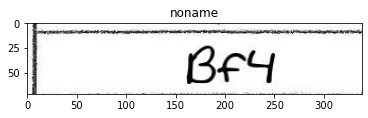

In [23]:
def get_random_cut_for( w):
    f= word_cuts[w][random.randrange( 0, len( word_cuts[w]))]
#     print( w, f)
    return resize_( _load_image( f), 339, 72)

show( get_random_cut_for('Bf4'))

In [24]:
def pt_to_pgn( w):
    # R=> K
    # T=> R
    # C=> N
    # B=> B
    # D=> Q

#     print( w, '=> ')
    png= w.replace( 'R', 'K').replace( 'T', 'R').replace( 'C', 'N').replace( 'D', 'Q')
#     print( png)
    return png

def to_pgn( label):
    return [pt_to_pgn( w) for w in label]

def pgn_to_pt( w):
    # R => T
    # K => R
    # N => C
    # Q => D
    
    return w.replace( 'R', 'T').replace( 'K', 'R').replace( 'N', 'C').replace( 'Q', 'D')

In [25]:
def random_label_from_vocab():
    label= []
    for i in range( 0, 16):
        label.append( 
            words[random.randrange( 0, len( words))]
        )
    return label

print( random_label_from_vocab())    

['f3', 'Bb2', 'Ne2', 'Nb3', 'Nb5', 'Nf6', 'cxb3', 'Qxc4', 'Na5', 'Nxc6', 'bxc6', 'Qd1', 'Ndb5', 'cxd6', 'Be5', 'Ng5']


In [26]:
def random_label_pt_from_vocab():
    label= []
    for i in range( 0, 16):
        label.append( 
            pgn_to_pt( words[random.randrange( 0, len( words))])
        )
    return label


print( random_label_pt_from_vocab())

['Be2', 'Cb5', 'e5', 'Cdb5', 'Bg3', 'Bxc4', 'De2', 'Dd2', 'Db3', 'b3', 'Bf3', 'f3', 'Dd2', 'Dxd5', 'Bxc6', 'exd5']


In [ ]:
#
# Gera datasets_pool a partir de parts
#

In [ ]:
# words= ['Ba4', 'Ba5', 'Ba7', 'Bb2', 'Bb3', 'Bb4', 'Bb4+', 'Bb5', 'Bb5+', 'Bb7', 'Bc4', 'Bc5', 'Bd2', 'Bd3', 'Bd6', 'Bd7', 'Be2', 'Be3', 'Be5', 'Be6', 'Be7', 'Bf3', 'Bf4', 'Bf5', 'Bg2', 'Bg3', 'Bg4', 'Bg5', 'Bg7', 'Bh4', 'Bh6', 'Bh7', 'Bxb4', 'Bxc3', 'Bxc3+', 'Bxc4', 'Bxc5', 'Bxc6', 'Bxc7', 'Bxd2+', 'Bxd6', 'Bxd7+', 'Bxf6', 'Kd8', 'Kxd8', 'Na4', 'Na5', 'Na6', 'Nb3', 'Nb4', 'Nb5', 'Nb6', 'Nbd2', 'Nbd7', 'Nbxd2', 'Nc2', 'Nc3', 'Nc5', 'Nc6', 'Nce7', 'Nd2', 'Nd4', 'Nd5', 'Nd6+', 'Nd7', 'Ndb5', 'Nde2', 'Ne1', 'Ne2', 'Ne4', 'Ne5', 'Ne7', 'Nf1', 'Nf3', 'Nf6', 'Nfd7', 'Ng5', 'Nge2', 'Nge7', 'Ngf3', 'Ngf6', 'Nh5', 'Nxc6', 'Nxd4', 'Nxd5', 'Nxd7', 'Nxe4', 'Nxe5', 'Nxf6+', 'O-O', 'O-O-O', 'Qa4', 'Qa5', 'Qa5+', 'Qb3', 'Qb6', 'Qc2', 'Qc3', 'Qc7', 'Qd1', 'Qd2', 'Qd3', 'Qd4', 'Qd5', 'Qd6', 'Qd7', 'Qe1', 'Qe2', 'Qe7', 'Qe8', 'Qf3', 'Qf6', 'Qg6', 'Qh4', 'Qxb2', 'Qxb3', 'Qxc4', 'Qxc7', 'Qxd4', 'Qxd5', 'Qxd6', 'Qxd8+', 'Qxe4+', 'Qxf6', 'Rb1', 'Rb8', 'Rc8', 'Re1', 'Re8', 'a3', 'a4', 'a5', 'a6', 'b3', 'b4', 'b5', 'b6', 'bxc3', 'bxc6', 'c3', 'c4', 'c5', 'c6', 'cxb3', 'cxd4', 'cxd5', 'cxd6', 'd3', 'd4', 'd5', 'd6', 'dxc3', 'dxc4', 'dxc5', 'dxc6', 'dxe4', 'e3', 'e4', 'e5', 'e6', 'exd4', 'exd5', 'exf6', 'f3', 'f4', 'f5', 'f6', 'g3', 'g5', 'g6', 'gxf6', 'h3', 'h4', 'h5', 'h6']

In [ ]:
# for w in words:
#     print( w, len( word_cuts[w])) 

In [ ]:

# # le todas a partes e guarda em lista por word
# #
# word_cuts= {}
# for w in words:
#     word_cuts[w]= glob( os.path.join( 'C:/mestrado/datasets/final/parts-lib/*', w, "*.jpg"))
# for w in words:
#     print( w, len( word_cuts[w])) 

In [ ]:
def get_random_cut_for( w):
    f= word_cuts[w][random.randrange( 0, len( word_cuts[w]))]
    if f is None:
        print( 'Oops nao encontrado para ', w)
        print( word_cuts[w])
#     print( w, f)
    return resize_( _load_image( f), 339, 72)


def resize( img, width, height):
    img= cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA) 
    return img

def rebuild( cuts):
    col1= np.concatenate((
            cuts[ 0], cuts[ 2], cuts[ 4], cuts[ 6], cuts[ 8], 
            cuts[10], cuts[12], cuts[14]
          ), axis= 0)
    col2= np.concatenate((
            cuts[ 1], cuts[ 3], cuts[ 5], cuts[ 7], cuts[ 9], 
            cuts[11], cuts[13], cuts[15]
          ), axis= 0)
    return np.concatenate((col1, col2), axis= 1)

def generate_for_label( label, seq, folder):    
    cuts= []
    for w in label:
        cuts.append( get_random_cut_for( w))
    img= rebuild( cuts)
#     show( img)
    img= resize( img, 345, 300)
    
    
    fname= "new-random_"+str( uuid.uuid4())[:8] 
#     show( img)
#     print( " ".join( label))
    write_image( os.path.join( folder, 'images', fname+ ".jpg"), img)
    write_label( os.path.join( folder, 'labels', fname+ ".pgn"), " ".join( label))
    
def generate_parts_pool( N):
    folder= os.path.join( "C:/mestrado/datasets/final/datasets_pool/parts")
    for i in range( 0, N):
        if i%100== 0:
            print( i)
        generate_for_label( random_label_from_vocab(), i+1, folder)
        
# generate_parts_pool( 30000)

In [ ]:
len( glob( os.path.join( 'C:/mestrado/datasets/final/parts-lib/from-handmade', 'bxc6', "*.jpg")))

In [46]:
#
# gera imagem montada, mas com sequencia validad e jogo
#
def get_30k_pgn():

    en_pgnfile= "C:/mestrado/datasets/jogos/pgn_30k_eng.txt"
    with open(en_pgnfile) as f:
        en_lines = [line.rstrip() for line in f]

    en_lines= [re.sub("[\[].*?[\]]", "", ln) for ln in en_lines]
    en_lines= [ln[8:] for ln in en_lines]
    en_lines= [ln.split() for ln in en_lines]
    return en_lines

en_lines= get_30k_pgn()

In [349]:
print( len( en_lines))

30000


In [49]:
print( en_lines[0])

['d4', 'f5', 'Nf3', 'g6', 'g3', 'Bg7', 'Bg2', 'Nf6', 'b4', 'c6', 'c4', 'd5', 'Qb3', 'Be6', 'c5', 'Ne4', 'O-O', 'Nd7', 'Bf4', 'O-O', 'Nbd2', 'Bf7', 'Qe3', 'Qe8', 'Bh6', 'Ndf6', 'Ne5', 'Nxd2', 'Qxd2', 'Nd7', 'Bxg7', 'Kxg7', 'Qf4', 'Be6', 'a4', 'Nxe5', 'Qxe5+', 'Rf6', 'f4', 'Kg8', 'Rfb1', 'Bc8', 'Qc7', 'Qd7', 'Qxd7', 'Bxd7', 'b5', 'Rff8', 'e3', 'e6', 'Bf1', 'Kf7', 'a5', 'Rfb8', 'Rb2', 'Ke7', 'Rab1', 'Rc8', 'bxc6', 'bxc6', 'Ba6', 'Rc7', 'Rb8', 'Rxb8', 'Rxb8', 'Be8', 'Bb7', 'Bd7', 'a6', 'Be8', 'Ra8', 'Bd7', 'Kf2', 'Kf6', 'Rh8', 'Kg7', 'Ra8', 'Kf6', 'Ke2', 'h6', 'Kd2', 'g5', 'Kc3', 'gxf4', 'exf4']


In [50]:
# pega somente os 16 primeiros
en_lines_16= [line[0:16] for line in en_lines]

In [54]:
# filtra os que estão no vocabulario
def is_all_in_words( label):
    return all( w in words for w in label)

is_all_in_words( en_lines_16[0])

True

In [55]:
fitered_enlabels= [list for list in en_lines_16 if is_all_in_words( list)]

In [56]:
print( 'all', len( en_lines_16), 'filtered', len(fitered_enlabels ))

all 30000 filtered 17586


In [92]:
valid_enlabels= [list for list in fitered_enlabels if len( list)== 16]
print( 'all', len( en_lines_16), 'filtered', len(fitered_enlabels ), 'valid', len( valid_enlabels))

all 30000 filtered 17586 valid 17066


In [112]:
#
# returna lista
#
def random_label_from_jogos():
    return valid_enlabels[ random.randrange( 0, len( valid_enlabels))]
print( random_label_from_jogos())

['d4', 'd5', 'Nf3', 'Nf6', 'Bf4', 'e6', 'e3', 'c5', 'Nbd2', 'Nc6', 'c3', 'Bd6', 'Bg3', 'O-O', 'Bd3', 'b6']


In [249]:
#
# gera imagem montada, mas com sequencia validad e jogo
#
def get_random_cut_for( w):
    f= word_cuts[w][random.randrange( 0, len( word_cuts[w]))]
    if f is None:
        print( 'Oops nao encontrado para ', w)
        print( word_cuts[w])
#     print( w, f)
    return resize_( _load_image( f), 339, 72)


def resize( img, width, height):
    img= cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA) 
    return img

def rebuild( cuts):
    col1= np.concatenate((
            cuts[ 0], cuts[ 2], cuts[ 4], cuts[ 6], cuts[ 8], 
            cuts[10], cuts[12], cuts[14]
          ), axis= 0)
    col2= np.concatenate((
            cuts[ 1], cuts[ 3], cuts[ 5], cuts[ 7], cuts[ 9], 
            cuts[11], cuts[13], cuts[15]
          ), axis= 0)
    return np.concatenate((col1, col2), axis= 1)

def generate_for_label( label, folder, tag=None):    
    cuts= []
    for w in label:
        cuts.append( get_random_cut_for( w))
    img= rebuild( cuts)
#     show( img)
    img= resize( img, 345, 300)
    
    if tag is None:
        tag= 'combined'
    fname= tag+"-"+str( uuid.uuid4())[:8] 
#     show( img)
#     print( " ".join( label))
    write_image( os.path.join( folder, 'images', fname+ ".jpg"), img)
    write_label( os.path.join( folder, 'labels', fname+ ".pgn"), " ".join( label))
    
def generate_parts_seq_pool( N):
    folder= os.path.join( "C:/mestrado/datasets/final/datasets_pool/parts-seq")
    for i in range( 0, N):
        if i%100== 0:
            print( i)
            
        label= random_label_from_jogos()    
        generate_for_label( label, folder)
        
# generate_parts_seq_pool( 30000)

In [269]:
words_ec= [w for w in words if (('e' in w or 'c' in w or 'N' in w) and 'x' not in w and not '+' in w and not 'Q' in w and not 'B' in w and 'R' not in w and 'Ng' not in w)]
print( words_ec)

['Na4', 'Na5', 'Na6', 'Nb3', 'Nb4', 'Nb5', 'Nb6', 'Nbd2', 'Nbd7', 'Nc2', 'Nc3', 'Nc5', 'Nc6', 'Nce7', 'Nd2', 'Nd4', 'Nd5', 'Nd7', 'Ndb5', 'Nde2', 'Ne1', 'Ne2', 'Ne4', 'Ne5', 'Ne7', 'Nf1', 'Nf3', 'Nf6', 'Nfd7', 'Nh5', 'c3', 'c4', 'c5', 'c6', 'e3', 'e4', 'e5', 'e6']


In [276]:
words_ec= list(set(
    [w for w in words if 'e' in w]+ 
    [w for w in words if 'N' in w]+ 
    [w for w in words if 'c' in w and 'x' not in w and not '+' in w and not 'Q' in w and not 'B' in w and 'R' not in w and 'Ng' not in w]))
print( words_ec)

['Nge2', 'c5', 'Nb3', 'Nb5', 'Nxd4', 'e5', 'Nxd7', 'Be2', 'Be5', 'e4', 'Nce7', 'exf6', 'Nbd7', 'Nd2', 'e3', 'exd4', 'Ngf3', 'Ndb5', 'Nfd7', 'Nbxd2', 'Re8', 'Nh5', 'Nf6', 'Qxe4+', 'Nb4', 'Nge7', 'Nf1', 'Nxe4', 'Na4', 'c6', 'Nxf6+', 'Nc3', 'Nf3', 'Ne1', 'Ne2', 'Ne7', 'Qe7', 'c3', 'Nd4', 'Na6', 'Na5', 'Qe1', 'Nc2', 'e6', 'Nd7', 'c4', 'Re1', 'Nbd2', 'Be3', 'Nb6', 'Nxc6', 'Nxd5', 'Nd6+', 'Ne5', 'Nc5', 'Be6', 'Nxe5', 'Qe2', 'Ngf6', 'Nde2', 'exd5', 'dxe4', 'Ng5', 'Qe8', 'Ne4', 'Nc6', 'Nd5', 'Be7']


In [384]:
print( len( words_ec), len( words), len( words_ec_v2))

68 175 13


In [279]:
def random_label_from_vocab_ec():
    label= []
    for i in range( 0, 16):
        label.append( 
            words_ec[random.randrange( 0, len( words_ec))]
        )
    return label

print( random_label_from_vocab_ec())    

['exd5', 'Qe1', 'Nxd4', 'e4', 'Ne2', 'Ne1', 'Re1', 'Nxd7', 'Nge7', 'Re8', 'Be6', 'Nge7', 'Qe7', 'Nxe5', 'Nd7', 'Nb6']


In [377]:
_= [pgn_to_pt(w) for w in words_ec]
_.sort()
" ".join(_)

'Be2 Be3 Be5 Be6 Be7 Ca4 Ca5 Ca6 Cb3 Cb4 Cb5 Cb6 Cbd2 Cbd7 Cbxd2 Cc2 Cc3 Cc5 Cc6 Cce7 Cd2 Cd4 Cd5 Cd6+ Cd7 Cdb5 Cde2 Ce1 Ce2 Ce4 Ce5 Ce7 Cf1 Cf3 Cf6 Cfd7 Cg5 Cge2 Cge7 Cgf3 Cgf6 Ch5 Cxc6 Cxd4 Cxd5 Cxd7 Cxe4 Cxe5 Cxf6+ De1 De2 De7 De8 Dxe4+ Te1 Te8 c3 c4 c5 c6 dxe4 e3 e4 e5 e6 exd4 exd5 exf6'

In [280]:
def generate_parts_ec_pool( N):
    folder= os.path.join( "C:/mestrado/datasets/final/datasets_pool/parts-ec")
    for i in range( 0, N):
        if i%100== 0:
            print( i)
            
        label= random_label_from_vocab_ec()    
        generate_for_label( label, folder, 'shuffle-ec-only')
        
generate_parts_ec_pool( 20000)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18


## pegando um conjunto ainda menor, baseado na matrix de confusao..


Matriz de confusao paral len=1
e4 => c4(0.1111111111111111) 
Cc3 => Cf3(1.0) 
d4 => e4(0.07692307692307693) 
c4 => e4(0.14285714285714285) d4(0.14285714285714285) 
g3 => e3(1.0)

Matriz de confusao para len=4
e4 => c4(0.14285714285714285) 
c5 => d5(0.043478260869565216) e6(0.021739130434782608) e5(0.06521739130434782) 
Bg5 => Cf3(1.0) 
Cc3 => Cf3(0.42857142857142855) 
exd5 => Cbd2(0.5) 
d5 => c5(0.038461538461538464) Cf6(0.038461538461538464) 
d4 => e4(0.05263157894736842) 
Cc6 => Cf6(0.05) 
Cf3 => O-O(0.014925373134328358) 
c4 => e4(0.1724137931034483) d4(0.034482758620689655) Ce4(0.034482758620689655) 
f5 => e5(0.5) Bg7(0.5) 
g6 => a6(0.05263157894736842) e6(0.05263157894736842) d6(0.05263157894736842) 
e6 => Cc6(0.03125) g6(0.125) d6(0.03125) c6(0.0625) 
Bb7 => g3(1.0) 
d6 => d5(0.13636363636363635) e6(0.045454545454545456) Cf6(0.045454545454545456) 
g3 => Bd2(0.1) 
e5 => e4(0.07692307692307693) c5(0.38461538461538464) d5(0.07692307692307693) 
b3 => Cf3(0.5) g3(0.5) 
Cf6 => d5(0.02631578947368421) e6(0.02631578947368421) d6(0.02631578947368421) O-O(0.02631578947368421) 
c6 => c5(0.2) Cc6(0.2) Cf6(0.2) 

In [303]:
words_ec_v2= ['b3', 'c5','c6', 'e3','e4','exd5','e5','g3','g6','Bg5', 'Nc3', 'Nf3','Nbd2']

In [304]:
[ w for w in words_ec_v2 if w not in words]

[]

In [335]:
def random_label_from_vocab_ec_v2():
    label= []
    for i in range( 0, 4):
        label.append( 
            words_ec_v2[random.randrange( 0, len( words_ec_v2))]
        )
    return label

print( random_label_from_vocab_ec_v2())    

['Nf3', 'g3', 'Nbd2', 'g6']


In [339]:
def rebuild_2lines( cuts):
    col1= np.concatenate((cuts[ 0], cuts[ 2]), axis= 0)
    col2= np.concatenate((cuts[ 1], cuts[ 3]), axis= 0)
    return np.concatenate((col1, col2), axis= 1)

def generate_for_label_2lines( label, folder, tag=None):    
    cuts= []
    for w in label:
        cuts.append( get_random_cut_for( w))
    img= rebuild_2lines( cuts)
#     show( img)
    img= resize( img, 345, 80)
    
    if tag is None:
        tag= 'combined'
    fname= tag+"-"+str( uuid.uuid4())[:8] 
#     show( img)
#     print( " ".join( label))
    write_image( os.path.join( folder, 'images', fname+ ".jpg"), img)
    write_label( os.path.join( folder, 'labels', fname+ ".pgn"), " ".join( label))

def generate_parts_ec_v2_2lines_pool( N):
    folder= os.path.join( "C:/mestrado/datasets/final/datasets_pool_2lines/parts-ec-v2")
    for i in range( 0, N):
        if i%100== 0:
            print( i)
            
        label= random_label_from_vocab_ec_v2()    
        generate_for_label_2lines( label, folder, 'shuffle-ec-v2-only')
        
generate_parts_ec_v2_2lines_pool( 2000)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [345]:
#
# subset mais reduzido de c e e
#

words_ec_v3= list(set(
    [w for w in words if 'e' in w]+ 
    [w for w in words if 'c' in w])) # and 'x' not in w and not '+' in w and not 'Q' in w and not 'B' in w and 'R' not in w and 'Ng' not in w]))
print( words_ec)



['Nge2', 'c5', 'Nb3', 'Nb5', 'Nxd4', 'e5', 'Nxd7', 'Be2', 'Be5', 'e4', 'Nce7', 'exf6', 'Nbd7', 'Nd2', 'e3', 'exd4', 'Ngf3', 'Ndb5', 'Nfd7', 'Nbxd2', 'Re8', 'Nh5', 'Nf6', 'Qxe4+', 'Nb4', 'Nge7', 'Nf1', 'Nxe4', 'Na4', 'c6', 'Nxf6+', 'Nc3', 'Nf3', 'Ne1', 'Ne2', 'Ne7', 'Qe7', 'c3', 'Nd4', 'Na6', 'Na5', 'Qe1', 'Nc2', 'e6', 'Nd7', 'c4', 'Re1', 'Nbd2', 'Be3', 'Nb6', 'Nxc6', 'Nxd5', 'Nd6+', 'Ne5', 'Nc5', 'Be6', 'Nxe5', 'Qe2', 'Ngf6', 'Nde2', 'exd5', 'dxe4', 'Ng5', 'Qe8', 'Ne4', 'Nc6', 'Nd5', 'Be7']


In [ ]:
#
# limpa datasets muito grandes. Deixa somente os 500 primeiros..
#
def limpa_datasets_grandes():
    for w in words:
        hand_files= glob( os.path.join( 'C:/mestrado/datasets/final/parts-lib/from-handmade', w, "*.jpg"))
        print( w, len( hand_files))
        if len( hand_files)> 300:
            print( 'removendo ', w, len( hand_files[300:]))
            for f in hand_files[300:]:
                os.remove( f)

    for w in words:
        hand_files= glob( os.path.join( 'C:/mestrado/datasets/final/parts-lib/from-torneios', w, "*.jpg"))
        print( w, len( hand_files))
        if len( hand_files)> 300:
            print( 'removendo ', w, len( hand_files[300:]))
            for f in hand_files[300:]:
                os.remove( f)

In [ ]:
#
# copia os manuais para o diretorio do dataset
#

org_dir= 'C:/mestrado/datasets/final/handmade-8lines/images'
files= glob( os.path.join( org_dir, "*.jpg"))

In [ ]:
len( files)

In [ ]:
N_train= int(len( files)*0.8)

In [ ]:
N_train

In [ ]:
files[0:1]

In [ ]:
random.shuffle(files)
print( files[0:1])

In [ ]:
#copia para o diretorio do dataset
for i in range( 0, len( files)):
    folder= "train" if i< N_train else "valid"
    f= files[i]
    
    dest_dir= os.path.join( "C:/mestrado/datasets/final/handmade-8lines/_splitted", folder)
    img_file= os.path.join( dest_dir, "images", Path(f).name)
    shutil.copyfile( f, img_file)
    shutil.copyfile( 
            f.replace( 'images', 'labels').replace( 'jpg', 'pgn'),                  
            img_file.replace( 'images', 'labels').replace( 'jpg', 'pgn'))

In [ ]:
#
# limpa dataset de handmande para deixar só os que estão dentro do vocabulario
#
files= glob( os.path.join( "C:/mestrado/datasets/final/handmade-8lines/all-/labels", "*.pgn"))
print( len( files))

In [ ]:
valids=[]
for f in files:
    label= read_label(f).split()
    if all( e in words for e in label):
        valids.append( f)
print( len( valids))

In [ ]:
for f in valids:
    shutil.copyfile( f, f.replace( 'all-', 'valids-for-vocab'))
    shutil.copyfile( 
        f.replace( 'labels', 'images').replace( '.pgn', '.jpg'), 
        f.replace( 'labels', 'images').replace( '.pgn', '.jpg').replace( 'all-', 'valids-for-vocab'))    

In [ ]:
for f in files:
    label= read_label(f).split()
    if not all( e in words for e in label):
        print( label)
        for w in label:
            print( w, w in words)
        break


In [ ]:
#
# gera random por fontes sinteticas
#

In [ ]:
def to_pgn( label):
    return [pt_to_pgn( w) for w in label]


img = Image.open("C:/mestrado/datasets/syn/template/template-2x.jpg")  # load base image
dctx = ImageDraw.Draw(img)  # create drawing context
dh_top= 14
dh_bottom= 26
h= (img.height - dh_top - dh_bottom)/25.0
w= img.width/4.0

margin_left= w/4
margin_top= h/6

def generate_for( line):
    img = Image.open("C:/mestrado/datasets/syn/template/template-2x.jpg")  # load base image
    dctx = ImageDraw.Draw(img)  # create drawing context

    i= 0
    for ln in range( 0, 8):
        for col in range( 0, 2):
            if i>= len( line):
                del dctx
                return img
        
            fnt= random.choice( all_fonts)
            txtsz = dctx.textsize(line[i], fnt)
        
            x= w* col + (w - txtsz[0])/2
            if random.random()< 0.7:
                xmargem= int( (w - txtsz[0])/3)
                x+= random.randint( -xmargem, xmargem)
            y= dh_top + h*ln + (h - txtsz[1])/2 #+ margin_top

            dctx.text( (x, y), line[i], font=fnt, fill="#000000")
            i= i+1
            
    del dctx 
    return img

def cut( img):
    h= 600
    w= 690 #345

    img1= img[:h, :w]
    return img1

def generate_one( label): 
    img= generate_for( label)
    img= cut( np.asarray(img))
    img= PIL.Image.fromarray(np.uint8(img))
    return img

def __generate_random( N):
#     N_train= int(N*0.8)
#     print( 'N', N, 'N_train', N_train)
    
    for i in range( 0, N):
        if( i%100== 0):
            clear_output(wait=True)
            print( i, '....')
        label_pt= random_label_pt_from_vocab()
        img= generate_one( label_pt)
#         img= random_transform( img, 0.3)
        pgn= to_pgn( label_pt)

#         folder= 'train' if i< N_train else 'valid'
        
        # save
#         show( img)
        img_file= os.path.join( 'C:/mestrado/datasets/final/datasets_pool/syn-2', 
                        'images', "random-syn--"+str( uuid.uuid4())[:6]+'.jpg')
        img.save( img_file)
        write_label( img_file.replace( 'images', 'labels').replace( '.jpg', '.pgn'), 
                    " ".join( to_pgn( label_pt)))

__generate_random( 20000)
print( 'DONE!')

In [ ]:
#
# Gera dataset combinando quantidades x, y e z do datasets de parts, sync e handmade
#

# le quantidades
files= glob( 'C:/mestrado/datasets/final/datasets_pool/*/labels/*.pgn')



In [ ]:
len( files)

In [ ]:
len( [f for f in files if 'from-syn' in f])

In [ ]:
print( 'hand', len( [f for f in files if 'hand' in f]))
print( 'parts', len( [f for f in files if 'parts' in f]))

In [ ]:
def generate_dataset( N, n_parts, n_sync, N_hand_max= None, ver= 'undefined'):
    #N_ratio = (parts,syn)
    
    # cria diretorio
    root= 'C:/mestrado/datasets/final/datasets/new-random-8lines--'+ ver
    Path( os.path.join( root, 'train/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'train/labels')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/labels')).mkdir(parents=True, exist_ok=True)
    
    # le os arquivos
    files_hand= glob( 'C:/mestrado/datasets/final/datasets_pool/hand/labels/*.pgn')
    files_syn= glob( 'C:/mestrado/datasets/final/datasets_pool/syn/labels/*.pgn')
    files_parts= glob( 'C:/mestrado/datasets/final/datasets_pool/parts/labels/*.pgn')
    
    N_hand= len( files_hand)
    if N_hand_max is not None:
        N_hand= min( N_hand_max, len( files_hand))

    
    N_parts= int( (N-N_hand)* (n_parts/(n_parts+n_sync)))
    N_syn= N - N_hand - N_parts
    
    print( 'gerar total', N, 'hand', N_hand, 'parts', N_parts, 'syc', N_syn)
    N_train= int( N*.8)
    print( 'train, valid', N_train, N-N_train)
    
#     return
    
    files= []
    files.extend( files_hand[:N_hand])
    files.extend( files_syn[:N_syn])
    files.extend( files_parts[:N_parts])
    
    # shuffle
    random.shuffle( files)
    print( len( files))
    
    # copia
    for i in range( 0, len( files)):
        if( i%100== 0):
#             clear_output(wait=True)
            print( i, '....')
        
        f= files[i]
        folder= 'train' if i< N_train else 'valid'
        
        # copia
        dest_file= os.path.join( root, folder, 'labels', Path(f).name)
        shutil.copyfile( f, dest_file)
        shutil.copyfile( 
            f.replace( 'labels', 'images').replace( 'pgn', 'jpg'),                  
            dest_file.replace( 'labels', 'images').replace( 'pgn', 'jpg'))
    
#generate_dataset( 15000, (2,1), None, 'v2')

In [ ]:
# def transform_file( f):
#     img= Image.open( f)
#     img= random_transform( img, None)
#     img.save( f)
    
def resize( path, width, height):
    img= cv2.imread( path)
#     show( img)
    img= cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA) 
#     show( img)
    cv2.imwrite( path, img)    

def resize_all( folder):
    # pega todas as imagens
    img_files= glob( os.path.join( folder, '*.jpg'))
    print( len( img_files))
                    
    # resize
    for i in range( 0, len( img_files)):
        if i%100== 0:
            print( i)
        f= img_files[ i]
        resize( f, 345, 300)
                    
    # para os sinteticos faz uma transformacao
#     synfiles= [f from f in img_files if 'syn' in f]
#     for f in synfiles:
#         transform_file( f)
    
    
resize_all( r'C:\mestrado\datasets\final\datasets_pool\syn\images')

In [ ]:
def generate_dataset_v2( n_hand, n_parts, n_sync, n_shuffle, ver):
    #N_ratio = (parts,syn)
    
    n_hand= min(2010 , n_hand)
    N= n_parts+ n_sync+ n_hand
    print( 'gerar total', N, 'hand', n_hand, 'parts', n_parts, 'syc', n_sync, 'shuffle', n_shuffle)
    
    
    # cria diretorio
    root= 'C:/mestrado/datasets/final/datasets/dataset-'+ ver
    Path( os.path.join( root, 'train/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'train/labels')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/labels')).mkdir(parents=True, exist_ok=True)
    
    # le os arquivos
    files_hand= glob( 'C:/mestrado/datasets/final/datasets_pool/hand/labels/*.pgn')
    print( 'files_hand', len( files_hand));
    files_syn= glob( 'C:/mestrado/datasets/final/datasets_pool/syn/labels/*.pgn')
    print( 'files_syn', len( files_syn));
    files_parts= glob( 'C:/mestrado/datasets/final/datasets_pool/parts/labels/*.pgn')
    print( 'files_parts', len( files_parts));
    files_shuffle= glob( 'C:/mestrado/datasets/final/datasets_pool/shuffle/labels/*.pgn')
    print( 'files_shuffle', len( files_shuffle));
    
#     N_hand= len( files_hand)
#     if N_hand_max is not None:
#         N_hand= min( N_hand_max, len( files_hand))

    
#     N_parts= int( (N-N_hand)* (n_parts/(n_parts+n_sync)))
#     N_syn= N - N_hand - N_parts
    
#     print( 'gerar total', N, 'hand', N_hand, 'parts', N_parts, 'syc', N_syn)
    N_train= int( N*.8)
    print( 'train, valid', N_train, N-N_train)
    
#     return
    
    files= []
    files.extend( files_hand[:n_hand])
    files.extend( files_syn[:n_sync])
    files.extend( files_parts[:n_parts])
    files.extend( files_shuffle[:n_shuffle])
    
    # shuffle
    random.shuffle( files)
    print( 'total', len( files))
#     return
    
    # copia
    for i in range( 0, len( files)):
        if( i%100== 0):
#             clear_output(wait=True)
            print( i, '....')
        
        f= files[i]
        folder= 'train' if i< N_train else 'valid'
        
        # copia
        dest_file= os.path.join( root, folder, 'labels', Path(f).name)
        shutil.copyfile( f, dest_file)
        shutil.copyfile( 
            f.replace( 'labels', 'images').replace( 'pgn', 'jpg'),                  
            dest_file.replace( 'labels', 'images').replace( 'pgn', 'jpg'))
    
generate_dataset_v2( 0, 16000, 0,0, 'v028--parts--16k')

In [343]:
def generate_dataset_v2_2lines( ver,
                               n_hand, n_parts, n_sync, n_shuffle, 
                               n_parts_seq,
                               n_parts_ec,
                               n_parts_ec_v2,
                               include_all_except_test= False, test=True):
    #N_ratio = (parts,syn)
    
    n_hand= min(2010 , n_hand)
    N= n_parts+ n_sync+ n_hand+ n_shuffle+ n_parts_seq+ n_parts_ec+ n_parts_ec_v2
#     print( 'gerar total', N, 'hand', n_hand, 'parts', n_parts, 'syc', n_sync, 'shuffle', n_shuffle,
#          'parts_seq', n_parts_seq
#          )
    
    
    # cria diretorio
    root= 'C:/mestrado/datasets/final/datasets/'+ ver
    Path( os.path.join( root, 'train/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'train/labels')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/labels')).mkdir(parents=True, exist_ok=True)
    
    
    files= []
    
    # le os arquivos
    if n_hand> 0:
        files_hand= glob( 'C:/mestrado/datasets/final/datasets_pool_2lines/hand/labels/*.pgn')
        print( 'files_hand', n_hand, '/', len( files_hand));
        files.extend( files_hand[:n_hand])

    if n_sync> 0:
        files_syn= glob( 'C:/mestrado/datasets/final/datasets_pool_2lines/syn/labels/*.pgn')
        print( 'files_syn', n_sync, '/', len( files_syn));
        files.extend( files_syn[:n_sync])

    if n_parts> 0:
        files_parts= glob( 'C:/mestrado/datasets/final/datasets_pool_2lines/parts/labels/*.pgn')
        print( 'files_parts', n_parts, '/', len( files_parts));
        files.extend( files_parts[:n_parts])

    if n_shuffle> 0:
        files_shuffle= glob( 'C:/mestrado/datasets/final/datasets_pool_2lines/shuffle/labels/*.pgn')
        print( 'files_parts', n_shuffle, '/', len( files_parts));
        files.extend( files_shuffle[:n_shuffle])
        
    if n_parts_seq> 0:
        files_parts_seq= glob( 'C:/mestrado/datasets/final/datasets_pool_2lines/parts-seq/labels/*.pgn')
        print( 'files_parts_seq', n_parts_seq, '/', len( files_parts_seq));
        files.extend( files_parts_seq[:n_parts_seq])
    
    if n_parts_ec> 0:
        files_parts_ec= glob( 'C:/mestrado/datasets/final/datasets_pool_2lines/parts-ec/labels/*.pgn')
        random.shuffle( files_parts_ec)
        print( 'files_parts_ec', n_parts_ec, '/', len( files_parts_ec));
        files.extend( files_parts_ec[:n_parts_ec])
    
    if n_parts_ec_v2> 0:
        files_parts_ec_v2= glob( 'C:/mestrado/datasets/final/datasets_pool_2lines/parts-ec-v2/labels/*.pgn')
        random.shuffle( files_parts_ec_v2)
        print( 'files_parts_ec_v2', n_parts_ec_v2, '/', len( files_parts_ec_v2));
        files.extend( files_parts_ec_v2[:n_parts_ec_v2])
    

    N_train= int( N*.8)
    print( 'train, valid', N_train, N-N_train)
    
    # shuffle
    random.shuffle( files)
    print( 'total', len( files))
    
    if len( files)!= N:
        print( 'total nao bate. Esperado=', N, 'obtido=', len(files))
        return
    
    if test:
        print( 'test. Done!')
        return
    
    # copia
    for i in range( 0, len( files)):
        if( i%100== 0):
            print( i, '....')
        
        f= files[i]
        folder= 'train' if i< N_train else 'valid'
        
        # copia
        dest_file= os.path.join( root, folder, 'labels', Path(f).name)
        shutil.copyfile( f, dest_file)
        shutil.copyfile( 
            f.replace( 'labels', 'images').replace( 'pgn', 'jpg'),                  
            dest_file.replace( 'labels', 'images').replace( 'pgn', 'jpg'))

    # os de teste copia todos para train
    if include_all_except_test== True:
        files= glob( 'C:/mestrado/datasets/final/datasets_pool_2lines/torneio-except-test/labels/*.pgn')        
        print( 'copiando ', len( files), ' para train')
        for f in files:
            folder= 'train'
            dest_file= os.path.join( root, folder, 'labels', Path(f).name)
            shutil.copyfile( f, dest_file)
            shutil.copyfile( 
                f.replace( 'labels', 'images').replace( 'pgn', 'jpg'),                  
                dest_file.replace( 'labels', 'images').replace( 'pgn', 'jpg'))
    
#n_hand, n_parts, n_sync, n_shuffle, ver
generate_dataset_v2_2lines( ver='dataset-v035--2lines-32k-v5.1.1',
                           n_hand=0, 
                           n_parts=0, 
                           n_sync=0,
                           n_shuffle=0,
                           n_parts_seq= 0,
                           n_parts_ec= 0,
                           n_parts_ec_v2= 1200,
                           include_all_except_test=False,
                           test= False)

files_parts_ec_v2 1200 / 2011
train, valid 960 240
total 1200
0 ....
100 ....
200 ....
300 ....
400 ....
500 ....
600 ....
700 ....
800 ....
900 ....
1000 ....
1100 ....


In [231]:
# cria shuffled parts somente com e-c


False

In [ ]:
str(uuid.uuid4())[:8]

In [ ]:
def generate_dataset_top16( n_parts, ver):
    #N_ratio = (parts,syn)
    
    N= n_parts
    print( 'gerar total', N, 'parts')
    
    
    # cria diretorio
    root= 'C:/mestrado/datasets/final/datasets/new-random-8lines--'+ ver
    Path( os.path.join( root, 'train/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'train/labels')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/labels')).mkdir(parents=True, exist_ok=True)
    
    files_parts= glob( 'C:/mestrado/datasets/final/datasets_pool/parts-top16/labels/*.pgn')
    print( 'files_parts', len( files_parts));
    
#     N_hand= len( files_hand)
#     if N_hand_max is not None:
#         N_hand= min( N_hand_max, len( files_hand))

    
#     N_parts= int( (N-N_hand)* (n_parts/(n_parts+n_sync)))
#     N_syn= N - N_hand - N_parts
    
#     print( 'gerar total', N, 'hand', N_hand, 'parts', N_parts, 'syc', N_syn)
    N_train= int( N*.8)
    print( 'train, valid', N_train, N-N_train)
    
#     return
    
    files= []
    files.extend( files_parts[:n_parts])
    
    # shuffle
    random.shuffle( files)
    print( len( files))
#     return
    
    # copia
    for i in range( 0, len( files)):
        if( i%100== 0):
#             clear_output(wait=True)
            print( i, '....')
        
        f= files[i]
        folder= 'train' if i< N_train else 'valid'
        
        # copia
        dest_file= os.path.join( root, folder, 'labels', Path(f).name)
        shutil.copyfile( f, dest_file)
        shutil.copyfile( 
            f.replace( 'labels', 'images').replace( 'pgn', 'jpg'),                  
            dest_file.replace( 'labels', 'images').replace( 'pgn', 'jpg'))
    
generate_dataset_top16( 10000, 'v14--parts-to16--10k')

In [ ]:
N_words= 32

def generate_dataset_top16( n_parts, ver):
    #N_ratio = (parts,syn)
    
    N= n_parts
    print( 'gerar total', N, 'parts')
    
    
    # cria diretorio
    root= 'C:/mestrado/datasets/final/datasets/new-random-8lines--'+ ver
    Path( os.path.join( root, 'train/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'train/labels')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/labels')).mkdir(parents=True, exist_ok=True)
    
    files_parts= glob( 'C:/mestrado/datasets/final/datasets_pool/parts-top16/labels/*.pgn')
    print( 'files_parts', len( files_parts));
    
#     N_hand= len( files_hand)
#     if N_hand_max is not None:
#         N_hand= min( N_hand_max, len( files_hand))

    
#     N_parts= int( (N-N_hand)* (n_parts/(n_parts+n_sync)))
#     N_syn= N - N_hand - N_parts
    
#     print( 'gerar total', N, 'hand', N_hand, 'parts', N_parts, 'syc', N_syn)
    N_train= int( N*.8)
    print( 'train, valid', N_train, N-N_train)
    
#     return
    
    files= []
    files.extend( files_parts[:n_parts])
    
    # shuffle
    random.shuffle( files)
    print( len( files))
#     return
    
    # copia
    for i in range( 0, len( files)):
        if( i%100== 0):
#             clear_output(wait=True)
            print( i, '....')
        
        f= files[i]
        folder= 'train' if i< N_train else 'valid'
        
        # copia
        dest_file= os.path.join( root, folder, 'labels', Path(f).name)
        shutil.copyfile( f, dest_file)
        shutil.copyfile( 
            f.replace( 'labels', 'images').replace( 'pgn', 'jpg'),                  
            dest_file.replace( 'labels', 'images').replace( 'pgn', 'jpg'))
    
generate_dataset_top16( 10000, 'v14--parts-to16--10k')

In [ ]:
#
# Constroi randomico a partir de vocabulario tal que na primeira posição venha somente os que aparecem 
# na primeira posição do dataset de testes
#

files= glob( r"C:\mestrado\datasets\final\datasets\new-random-8lines--v1--test-only\test\labels\*.pgn")
print( len( files))

In [ ]:
labels= [read_label(f) for f in files]

In [ ]:
labels= [label.split() for label in labels]

In [ ]:
p0= [label[0] for label in labels]

In [ ]:
pc= Counter( p0)

In [ ]:
pc

In [ ]:
words_p0= [key for (key, value) in pc.items()]

In [ ]:
words_p0

In [ ]:
words

In [ ]:
words= ['Ba4', 'Ba5', 'Ba7', 'Bb2', 'Bb3', 'Bb4', 'Bb4+', 'Bb5', 'Bb5+', 'Bb7', 'Bc4', 'Bc5', 'Bd2', 'Bd3', 'Bd6', 'Bd7', 'Be2', 'Be3', 'Be5', 'Be6', 'Be7', 'Bf3', 'Bf4', 'Bf5', 'Bg2', 'Bg3', 'Bg4', 'Bg5', 'Bg7', 'Bh4', 'Bh6', 'Bh7', 'Bxb4', 'Bxc3', 'Bxc3+', 'Bxc4', 'Bxc5', 'Bxc6', 'Bxc7', 'Bxd2+', 'Bxd6', 'Bxd7+', 'Bxf6', 'Kd8', 'Kxd8', 'Na4', 'Na5', 'Na6', 'Nb3', 'Nb4', 'Nb5', 'Nb6', 'Nbd2', 'Nbd7', 'Nbxd2', 'Nc2', 'Nc3', 'Nc5', 'Nc6', 'Nce7', 'Nd2', 'Nd4', 'Nd5', 'Nd6+', 'Nd7', 'Ndb5', 'Nde2', 'Ne1', 'Ne2', 'Ne4', 'Ne5', 'Ne7', 'Nf1', 'Nf3', 'Nf6', 'Nfd7', 'Ng5', 'Nge2', 'Nge7', 'Ngf3', 'Ngf6', 'Nh5', 'Nxc6', 'Nxd4', 'Nxd5', 'Nxd7', 'Nxe4', 'Nxe5', 'Nxf6+', 'O-O', 'O-O-O', 'Qa4', 'Qa5', 'Qa5+', 'Qb3', 'Qb6', 'Qc2', 'Qc3', 'Qc7', 'Qd1', 'Qd2', 'Qd3', 'Qd4', 'Qd5', 'Qd6', 'Qd7', 'Qe1', 'Qe2', 'Qe7', 'Qe8', 'Qf3', 'Qf6', 'Qg6', 'Qh4', 'Qxb2', 'Qxb3', 'Qxc4', 'Qxc7', 'Qxd4', 'Qxd5', 'Qxd6', 'Qxd8+', 'Qxe4+', 'Qxf6', 'Rb1', 'Rb8', 'Rc8', 'Re1', 'Re8', 'a3', 'a4', 'a5', 'a6', 'b3', 'b4', 'b5', 'b6', 'bxc3', 'bxc6', 'c3', 'c4', 'c5', 'c6', 'cxb3', 'cxd4', 'cxd5', 'cxd6', 'd3', 'd4', 'd5', 'd6', 'dxc3', 'dxc4', 'dxc5', 'dxc6', 'dxe4', 'e3', 'e4', 'e5', 'e6', 'exd4', 'exd5', 'exf6', 'f3', 'f4', 'f5', 'f6', 'g3', 'g5', 'g6', 'gxf6', 'h3', 'h4', 'h5', 'h6']
   

In [ ]:
def random_label_from_vocab_and_p0(w, w0):
    label= []
    label.append( w0[random.randrange( 0, len(w0))])
    for i in range( 1, 16):
        label.append( 
            words[random.randrange( 0, len( words))]
        )
    return label

def resize( img, width, height):
    img= cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA) 
    return img

def rebuild( cuts):
    col1= np.concatenate((
            cuts[ 0], cuts[ 2], cuts[ 4], cuts[ 6], cuts[ 8], 
            cuts[10], cuts[12], cuts[14]
          ), axis= 0)
    col2= np.concatenate((
            cuts[ 1], cuts[ 3], cuts[ 5], cuts[ 7], cuts[ 9], 
            cuts[11], cuts[13], cuts[15]
          ), axis= 0)
    return np.concatenate((col1, col2), axis= 1)

def generate_for_label( label, folder):
#     print( 'label', label)
    cuts= []
    for w in label:
        cuts.append( get_random_cut_for( w))
    img= rebuild( cuts)
    img= resize( img, 345, 300)
    
    fname= "ss-8lines-"+str( uuid.uuid4())[:8] 
#     show( img)
    write_image( os.path.join( folder, 'images', fname+ ".jpg"), img)
    write_label( os.path.join( folder, 'labels', fname+ ".pgn"), " ".join( label))
    
def generate_database( N, dataset_name):
    #N_ratio = (parts,syn)
    
    print( 'gerar total', N, 'parts')
    
    # cria diretorio
    root= 'C:/mestrado/datasets/final/datasets/'+ dataset_name
    Path( os.path.join( root, 'train/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'train/labels')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/labels')).mkdir(parents=True, exist_ok=True)

    N_train= int( N*0.8)
    for i in range( 0, N):
        if i%100== 0:
            print( i)
        folder= "train" if i< N_train else "valid"
        label= random_label_from_vocab_and_p0(words, words_p0)
        generate_for_label( label, os.path.join( root, folder))

print( 'words na posicao 0', words_p0)        
generate_database( 5000, 'dataset-v021-5k-voc180--parts-rd--p0-red')

In [ ]:
#
# brincando com o conjunto randomico inicial
#

In [ ]:
labels_files= glob( r"C:\mestrado\datasets\final\parts-lib-rand-1500\carnaval_8lines_shuffle_parts\labels\*.pgn")

In [ ]:
len( labels)

In [ ]:
labels= [read_label(f) for f in labels]

In [ ]:
labels[0:10]

In [ ]:
# labels= [label.split() for label in labels]
# p0= [label[0] for label in labels]
counter1= Counter( labels)
words1= [key for (key, value) in counter1.items()]


In [ ]:
len( words1)

In [ ]:
WF-M5299def save_part( label, imgfile):
    label= label.replace( '...', '___')
    dest_imgdir= r"C:\mestrado\datasets\final\parts-lib-rand-1500\from-carnaval-1500"
    folder= os.path.join( dest_imgdir, label)

    Path(folder).mkdir(parents=True, exist_ok=True)
#     fname= label+"_part1500_"+ str( uuid.uuid4())[:6]+'.jpg'
#         print( 'save to ', fname)

#     destfile= os.path.join( folder, fname)
#     print( imgfile, destfile)
    copyfile( imgfile, os.path.join( folder, Path( imgfile).name))


for i in range( 0, len( labels_files)): #len( labels_files):
    f= labels_files[i]
#     print( f, labels[i])
    save_part( labels[i], f.replace( 'labels', 'images').replace( '.pgn', '.jpg'))

In [ ]:

# le todas a partes e guarda em lista por word
#
word_cuts1= {}
for w in words1:
    word_cuts1[w]= glob( os.path.join( r'C:\mestrado\datasets\final\parts-lib-rand-1500\from-carnaval-1500', w, "*.jpg"))
	
for w in words1:
    print( w, len( word_cuts1[w]))


In [ ]:
# le todas as imagens e todos os labels. supoe que estao na mesma ordem
shuffle_images= glob( r"C:\mestrado\datasets\final\parts-lib-rand-1500\from-carnaval-1500\*\*.jpg")

In [ ]:
print( len(shuffle_images ))

In [ ]:
# Extrai label
def get_label( f) :
    return Path( f).name[11:16].replace( "_", "")
    
shuffle_labels= [get_label( f) for f in shuffle_images]
print( shuffle_labels[0:10], '...', shuffle_labels[-10:])

# resultado em shuffle_images e shuffle_labels

In [ ]:
def get_random_cut_and_label():
    cuts= []
    labels= []
    for i in range( 0, 16):
        ix= random.randrange( 0, len( shuffle_labels))
        
        cuts.append( _load_image( shuffle_images[ix]))
        labels.append( shuffle_labels[ix])
    return cuts, labels

        
cuts, labels= get_random_cut_and_label()

In [ ]:
print( labels)
for cut in cuts:
    show( cut)

In [ ]:
# def random_label_from_vocab_and_p0(w, w0):
#     label= []
#     label.append( w0[random.randrange( 0, len(w0))])
#     for i in range( 1, 16):
#         label.append( 
#             words[random.randrange( 0, len( words))]
#         )
#     return label

def resize( img, width, height):
    img= cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA) 
    return img

def rebuild( cuts):
    col1= np.concatenate((
            cuts[ 0], cuts[ 2], cuts[ 4], cuts[ 6], cuts[ 8], 
            cuts[10], cuts[12], cuts[14]
          ), axis= 0)
    col2= np.concatenate((
            cuts[ 1], cuts[ 3], cuts[ 5], cuts[ 7], cuts[ 9], 
            cuts[11], cuts[13], cuts[15]
          ), axis= 0)
    return np.concatenate((col1, col2), axis= 1)

def generate_for_label( folder):
#     print( 'label', label)
#     cuts= []
#     for w in label:
#         cuts.append( get_random_cut_for( w))
    cuts, labels= get_random_cut_and_label()
    img= rebuild( cuts)
    img= resize( img, 345, 300)
    
    fname= "ss-8lines-shuffle-"+str( uuid.uuid4())[:8] 
#     show( img)
    write_image( os.path.join( folder, 'images', fname+ ".jpg"), img)
    write_label( os.path.join( folder, 'labels', fname+ ".pgn"), " ".join( labels))
    
def generate_database( N, dataset_name):
    #N_ratio = (parts,syn)
    
    print( 'gerar total', N, 'parts')
    
    # cria diretorio
    root= 'C:/mestrado/datasets/final/datasets/'+ dataset_name
    Path( os.path.join( root, 'train/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'train/labels')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/labels')).mkdir(parents=True, exist_ok=True)

    N_train= int( N*0.8)
    for i in range( 0, N):
        if i%100== 0:
            print( i)
        folder= "train" if i< N_train else "valid"
        generate_for_label( os.path.join( root, folder))

# print( 'words na posicao 0', words_p0)        
generate_database( 7000, 'dataset-v022-7k-shuffle-parts1500')

In [ ]:
#
# remove partes que tem 'f' e 'g'
#

In [ ]:
f_folders= glob( r'C:\mestrado\datasets\final\parts-lib\from-handmade\*f*')
g_folders= glob( r'C:\mestrado\datasets\final\parts-lib\from-handmade\*g*')
folders= f_folders+ g_folders

In [ ]:
len( folders)

In [ ]:
f_folders

In [ ]:
g_folders

In [ ]:
folders[0]

In [ ]:
shutil.move( folders[0], r'C:\mestrado\datasets\final\parts-lib--f-and-g')

In [ ]:
for f in folders:
    shutil.move( f, r'C:\mestrado\datasets\final\parts-lib--f-and-g\from-handmade')

In [ ]:
#
# Gerar dataset de 2 linhas
#


In [ ]:
imgfile= r"C:\mestrado\datasets\final\datasets_pool\parts\images\new-random_000e179e.jpg"

In [ ]:
img= _load_image( imgfile)

In [ ]:
show( img)

In [ ]:
show( img[0:int(img.shape[0]/4),img[0:int(img.shape[1]/4)])

In [ ]:
h= int(img.shape[0]/4)
w= int(img.shape[1]/4)
print( h, w)

In [ ]:
show( img[:h,:])

In [ ]:
files= glob( r"C:\mestrado\datasets\final\datasets_pool\parts\images\*.jpg")

In [ ]:

    
# img8to2lines( files[random.randrange( len( files))])

In [281]:
def img8to2lines( f):
    img= _load_image( f)
    dh= 3
    h= int(img.shape[0]/4)+dh
    w= int(img.shape[1]/4)
    cut= img[:h,:]
    return cut

def convert2lines( srcdir, destdir, test=False):
    files= glob( os.path.join( srcdir, "*.jpg"))
    random.shuffle(files)
    print( 'processando ', len( files), ' arquivos')
#     for i in range( 0, 2): 
    N= 1 if test==True else len( files)
    for i in range( 0, N):
        f= files[i]
        if i%500== 0:
            print( i)
        cut= img8to2lines( f)
        destfile= os.path.join( destdir, Path(f).name)
        if test:
            print( 'write to ', destfile)
            show( cut)
        else:
            write_image( destfile, cut)    
                
convert2lines( 
    r"C:\mestrado\datasets\final\datasets_pool\parts-ec\images",
    r"C:\mestrado\datasets\final\datasets_pool_2lines\parts-ec\images", test=False)

processando  30000  arquivos
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500


In [282]:
def label8to2lines( f):
    label= read_label( f)
    label= " ".join( label.split()[0:4])
    return label

# print( label8to2lines( r"C:\mestrado\datasets\final\datasets_pool\parts\labels\new-random_0000bdf6.pgn"))
                    
def convert2lines_label( srcdir, destdir):
    files= glob( os.path.join( srcdir, "*.pgn"))
    print( 'processando ', len( files), ' arquivos')
    for i in range( 0, len( files)):
        f= files[i]
        if i%500== 0:
            print( i)
        label= label8to2lines( f)
        destfile= os.path.join( destdir, Path(f).name)
        write_label( destfile, label)    
                
convert2lines_label( 
    r"C:\mestrado\datasets\final\datasets_pool\parts-ec\labels",
    r"C:\mestrado\datasets\final\datasets_pool_2lines\parts-ec\labels")

processando  30000  arquivos
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500


In [ ]:
def img8to2lines( f):
    img= _load_image( f)
    dh= 20
    h= int(img.shape[0]/4)+dh
    w= int(img.shape[1]/4)
    cut= img[:h,:]
#     show( cut)
    return cut

def convert2lines( srcdir, destdir):
    files= glob( os.path.join( srcdir, "*.jpg"))
    print( 'processando ', len( files), ' arquivos')
    for i in range( 0, len( files)):
        f= files[i]
        if i%500== 0:
            print( i)
        cut= img8to2lines( f)
        destfile= os.path.join( destdir, Path(f).name)
        write_image( destfile, cut)    
                
convert2lines( 
    r"C:\mestrado\datasets\final\datasets\new-random-8lines--v1--test-only\test--v2\images",
    r"C:\mestrado\datasets\final\datasets\new-random-8lines--v1--test-only-2lines\test--v2\images")



In [ ]:
files= glob( r"C:\mestrado\datasets\final\datasets\new-random-8lines--v1--test-only\test\images\*.jpg")

In [ ]:
show( img8to2lines( files[random.randrange( 0, len( files))]))

In [ ]:
def shuffle_labels():
    f= r"C:\mestrado\datasets\final\datasets\new-random-8lines--v1--test-only-2lines\all-labels-.pgn"
    label= read_label( f).split()
    print( label)
    random.shuffle( label)
    random.shuffle( label)
    random.shuffle( label)
    print( '- ', label)
    write_label( r"C:\mestrado\datasets\final\datasets\new-random-8lines--v1--test-only-2lines\all-labels-shuffle.pgn",
                " ".join( label))
    
shuffle_labels()
    
    

In [ ]:
#
# rotina temporaria para limpar os que estao em testes
#


In [193]:
files= glob( r"C:\mestrado\datasets\final\datasets\new-random-8lines--v1--test-only-2lines\test\images\*.jpg" )

In [194]:
len( files)

114

In [196]:
# remove da base original os que estao em files
remove_dir= r"C:\mestrado\datasets\final\datasets_pool\torneio-except-test\images"

for f in files:
    fname= Path( f).name
    
    imgpath= os.path.join( remove_dir, 'carnaval_'+fname[9:13]+'_line_1_8.jpg')
    if os.path.exists( imgpath):
#     print( fullpath, '-> ', os.path.exists( imgpath))
        print( 'remove ', imgpath)
        os.remove( imgpath)
    
    labelpath= imgpath.replace( 'images', 'labels').replace( 'jpg', 'pgn')
#     print( fullpath, '-> ', os.path.exists( imgpath))
    if os.path.exists( labelpath):
        print( 'remove ', labelpath)
        os.remove( labelpath)


remove  C:\mestrado\datasets\final\datasets_pool\torneio-except-test\images\carnaval_0004_line_1_8.jpg
remove  C:\mestrado\datasets\final\datasets_pool\torneio-except-test\labels\carnaval_0004_line_1_8.pgn
remove  C:\mestrado\datasets\final\datasets_pool\torneio-except-test\images\carnaval_0015_line_1_8.jpg
remove  C:\mestrado\datasets\final\datasets_pool\torneio-except-test\labels\carnaval_0015_line_1_8.pgn
remove  C:\mestrado\datasets\final\datasets_pool\torneio-except-test\images\carnaval_0023_line_1_8.jpg
remove  C:\mestrado\datasets\final\datasets_pool\torneio-except-test\labels\carnaval_0023_line_1_8.pgn
remove  C:\mestrado\datasets\final\datasets_pool\torneio-except-test\images\carnaval_0029_line_1_8.jpg
remove  C:\mestrado\datasets\final\datasets_pool\torneio-except-test\labels\carnaval_0029_line_1_8.pgn
remove  C:\mestrado\datasets\final\datasets_pool\torneio-except-test\images\carnaval_0032_line_1_8.jpg
remove  C:\mestrado\datasets\final\datasets_pool\torneio-except-test\labe

In [ ]:
#
# processa jogos da hebraica, para testes
#

In [165]:
# le todos os arquivs
files= glob( r"C:\mestrado\datasets\extra-final-test\hebraica\originais\*.jpg")

In [166]:
print( len( files))

284


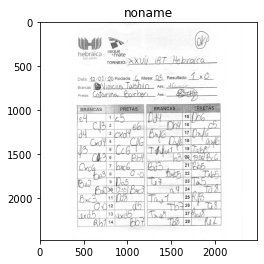

In [168]:
img= _load_image( files[0])
show( img)

In [171]:
img.shape

(2480, 2480, 3)

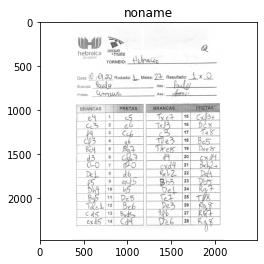

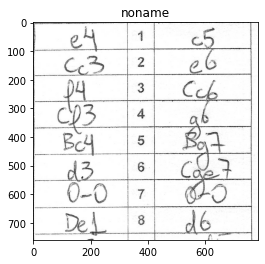

In [192]:
img= _load_image( files[random.randrange( 0, len( files))])
img_8lines=img[1030:1790,415:1200] 
show( img)
show( img_8lines)
# show( img[:100, :200])

In [378]:
#
# cria o equivalente de 8 linhas de um dataset de 2 linhas
#
files= glob( r'C:\mestrado\datasets\final\datasets\dataset-v035--2lines-32k-v5.1\*\images\*.jpg')

In [379]:
print( len( files))

34888


In [200]:
#   *scan*.jpg
#   *combined*.jpg
#   *new-random*.pgn"
#   *random-sys*.pgn
#    *shuffled*.pgn

fscan= [ f for f in files if 'scan' in f]

In [380]:
fscan= [ f for f in files if 'scan' in f]
fcombined= [ f for f in files if 'combined' in f]
fnewrandom= [ f for f in files if 'new-random' in f]
frandomsyn= [ f for f in files if 'random-syn' in f]
fshuffled= [ f for f in files if 'shuffled' in f]
fshuffled_ec= [ f for f in files if 'shuffle-ec-only' in f]
fcarnaval= [ f for f in files if 'carnaval' in f]

In [381]:
print( 'fscan', len( fscan))
print( 'fcombined', len( fcombined))
print( 'fnewrandom', len( fnewrandom))
print( 'frandomsyn', len( frandomsyn))
print( 'fshuffled', len( fshuffled))
print( 'fshuffled_ec', len( fshuffled_ec))
print( 'fcarnaval', len( fcarnaval))


fscan 2010
fcombined 10000
fnewrandom 10000
frandomsyn 0
fshuffled 2500
fshuffled_ec 10000
fcarnaval 378


In [33]:
def composicao_dataset_of( dataset, verbose=True):
    
    folder = r'C:\mestrado\repos-github\chess-attention\trained--for-evaluation\notebooks\train-folder\tmp'
    files= glob( os.path.join( folder, dataset, r'train\images\*.jpg'))
    if verbose:
        print( 'lidos', len( files), 'arquivos');
    
    files = [Path(f).name for f in files]


    q = {}
    q['scan']= len([ f for f in files if 'scan' in f])
    q['combined']= len([ f for f in files if 'combined' in f])
    q['newrandom']= len([ f for f in files if 'new-random' in f])
    q['randomsyn']= len([ f for f in files if 'random-syn' in f])
    q['shuffled']= len([ f for f in files if 'shuffled' in f])
    q['shuffled_ec']= len([ f for f in files if 'shuffle-ec-only' in f])
    q['carnaval']= len([ f for f in files if 'carnaval' in f])
    q['hebraica']= len([ f for f in files if 'hebraica' in f])

    if verbose:
        print( q)
        print( 'total', sum( q.values()))
        for key in q.keys():
            print( key, q[key])
#     print( 'fscan (escritos à mão)','\t', len( fscan))
#     print( 'fcombined(combinados sequencia real)', '\t', len( fcombined))
#     print( 'fnewrandom (combinados random)', '\t', len( fnewrandom))
#     print( 'frandomsyn (combinados random syn)', '\t', len( frandomsyn))
#     print( 'fshuffled (randomicos fáceis)', '\t', len( fshuffled))
#     print( 'fshuffled_ec (randomicos e c somente)', '\t', len( fshuffled_ec))
#     print( 'fcarnaval (torneio)', '\t', len( fcarnaval))
#     print( 'hebraica (torneio)', '\t', len( fhebraica))

#     print( 'total somado= ', 
#                     len( fscan)+ len( fcombined)+ len( fnewrandom)+ len( frandomsyn)+
#                     len( fshuffled)+ len( fshuffled_ec)+ len( fcarnaval)+ len( fhebraica))

    if verbose:
        print( 'total de imagens: ', len(files))
    
    total = len(files)
    MANUAL = q['scan']+q['carnaval']+q['hebraica']
    RAND =  q['newrandom'] + q['randomsyn'] + q['shuffled']
    SUB = q['shuffled_ec']
    SEQ = q['combined']

    if verbose:
        print( "MANUAL RAND SEQ SUB")
        print( "%d %d %d %d" % (MANUAL, RAND, SEQ, SUB))
        print( "%.2f %.2f %.2f %.2f" % (100*MANUAL/total, 100*RAND/total, 100*SEQ/total, 100*SUB/total))
    return ("%.2f %.2f %.2f %.2f" % (100*MANUAL/total, 100*RAND/total, 100*SEQ/total, 100*SUB/total), total, dataset)
    
    

# composicao_dataset_of( folder + r'\nivel-0--dataset-v034--2lines-parts--42k')
print( composicao_dataset_of( 'mixed-com-hebraica--metade-1', verbose=False))



('8.86 57.21 23.30 10.63', 22369, 'mixed-com-hebraica--metade-1')


In [34]:
datasets = glob( r'C:\mestrado\repos-github\chess-attention\trained--for-evaluation\notebooks\train-folder\tmp\*')
datasets = [os.path.basename( f) for f in datasets]
for d in datasets:
    print( composicao_dataset_of( d, verbose=False))

('7.05 7.41 0.00 0.00', 1120, 'dataset-2lines-v.2.0.1')
('5.23 59.49 24.22 11.05', 21512, 'mixed')
('8.86 57.21 23.30 10.63', 22369, 'mixed-com-hebraica--metade-1')
('4.79 95.21 0.00 0.00', 33608, 'nivel-0--dataset-v034--2lines-parts--42k')
('4.73 76.21 19.05 0.00', 41986, 'nivel-1--dataset-v034--2lines-parts--42k-v3')
('5.64 38.13 44.99 11.24', 35586, 'nivel-2--dataset-v034--2lines-parts--40k-v4')
('7.33 47.93 29.73 15.01', 26786, 'nivel-4--dataset-v035--2lines-32k-v5.0')
('7.04 35.70 28.64 28.62', 27986, 'nivel-5--dataset-v035--2lines-32k-v5.1')


In [35]:
print( composicao_dataset_of( 'nivel-6--hebraica-metade-1', verbose=False))

('7.30 35.60 28.56 28.54', 28063, 'nivel-6--hebraica-metade-1')


In [393]:
	print( 'fscan (escritos à mão)','\t', 10)


fscan (escritos à mão) 	 10


In [208]:
total= len( fscan)+ len( fcombined)+ len( fnewrandom)+ len( frandomsyn)+ len( fshuffled)+ len( fcarnaval)
print( total)
print( len( files))

52388
52388


In [214]:
# verifica se tem o arquivo para 8 linhas
for f in fscan:
    ff= os.path.join( r"C:\mestrado\datasets\final\datasets_pool\hand\images", Path( f).name)
    if not os.path.exists( ff):
        print( ff)
for f in fcombined:
    ff= os.path.join( r"C:\mestrado\datasets\final\datasets_pool\parts-seq\images", Path( f).name)
    if not os.path.exists( ff):
        print( ff)
for f in fnewrandom:
    ff= os.path.join( r"C:\mestrado\datasets\final\datasets_pool\parts\images", Path( f).name)
    if not os.path.exists( ff):
        print( ff)
for f in frandomsyn:
    ff= os.path.join( r"C:\mestrado\datasets\final\datasets_pool\syn\images", Path( f).name)
    if not os.path.exists( ff):
        print( ff)
for f in fshuffled:
    ff= os.path.join( r"C:\mestrado\datasets\final\datasets_pool\shuffle\images", Path( f).name)
    if not os.path.exists( ff):
        print( ff)
for f in fcarnaval:
    ff= os.path.join( r"C:\mestrado\datasets\final\datasets_pool\torneio-except-test\images", Path( f).name)
    if not os.path.exists( ff):
        print( ff)

In [219]:
for f in files:
    fromFile= None 
    if 'scan' in f:
        fromFile= os.path.join( r"C:\mestrado\datasets\final\datasets_pool\hand\images", Path( f).name)
    if 'combined' in f:
        fromFile= os.path.join( r"C:\mestrado\datasets\final\datasets_pool\parts-seq\images", Path( f).name)
    if 'new-random' in f:
        fromFile= os.path.join( r"C:\mestrado\datasets\final\datasets_pool\parts\images", Path( f).name)
    if 'random-syn' in f:
        fromFile= os.path.join( r"C:\mestrado\datasets\final\datasets_pool\syn\images", Path( f).name)
    if 'shuffled' in f:
        fromFile= os.path.join( r"C:\mestrado\datasets\final\datasets_pool\shuffle\images", Path( f).name)
    if 'carnaval' in f:
        fromFile= os.path.join( r"C:\mestrado\datasets\final\datasets_pool\torneio-except-test\images", Path( f).name)

#     if not os.path.exists( fromFile):
#         print( fromFile, 'not exists!')
    toFile= f.replace( 'dataset-v034--2lines-parts--42k-v3', 'dataset-v034--parts--42k-v3')
#     print( 'copy from ', fromFile, 'to ', toFile)
    
    shutil.copyfile( fromFile, toFile)
    shutil.copyfile( 
            fromFile.replace( 'images', 'labels').replace( 'jpg', 'pgn'),                  
            toFile.replace( 'images', 'labels').replace( 'jpg', 'pgn'))

In [ ]:
#
# validando dados de testes
#

In [290]:
files= glob( r'C:\mestrado\datasets\final-target-test\--2lines\test\labels\*.pgn')

In [293]:
labels= [ read_label(f).split()[:4] for f in files]

['e4', 'd5', 'exd5', 'Qxd5']
C:\mestrado\datasets\final-target-test\--2lines\test\labels\carnaval_0090_fullpage.pgn


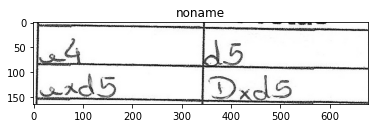

['e4', 'd5', 'exd5', 'Nf6']
C:\mestrado\datasets\final-target-test\--2lines\test\labels\carnaval_0232_fullpage.pgn


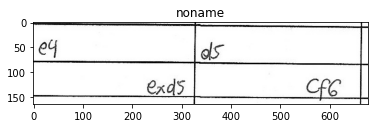

In [299]:
def find_image_with( w):
    for i in range( 0, len( labels)):
        if w in labels[i]:
            print( labels[i])
            print( files[i])
            show( _load_image( files[i].replace( '.pgn', '.jpg').replace( 'labels', 'images')))
find_image_with( pt_to_pgn( 'exd5'))

['Nf3', 'b6', 'g3', 'Bb7']
C:\mestrado\datasets\final-target-test\--2lines\test\labels\carnaval_0592_fullpage.pgn


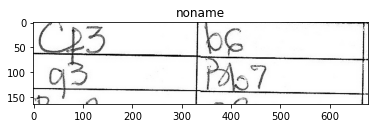

In [301]:
find_image_with( pt_to_pgn( 'Bb7'))

['Nf3', 'b6', 'g3', 'Bb7']
C:\mestrado\datasets\final-target-test\--2lines\test\labels\carnaval_0592_fullpage.pgn


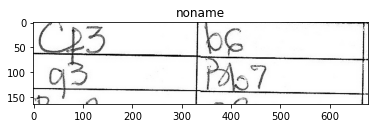

In [348]:
find_image_with( pt_to_pgn( 'b6'))

In [360]:
pt_lines= [[pgn_to_pt(w) for w in label] for label in en_lines]

In [361]:
pt_lines[0]

['d4',
 'f5',
 'Cf3',
 'g6',
 'g3',
 'Bg7',
 'Bg2',
 'Cf6',
 'b4',
 'c6',
 'c4',
 'd5',
 'Db3',
 'Be6',
 'c5',
 'Ce4',
 'O-O',
 'Cd7',
 'Bf4',
 'O-O',
 'Cbd2',
 'Bf7',
 'De3',
 'De8',
 'Bh6',
 'Cdf6',
 'Ce5',
 'Cxd2',
 'Dxd2',
 'Cd7',
 'Bxg7',
 'Rxg7',
 'Df4',
 'Be6',
 'a4',
 'Cxe5',
 'Dxe5+',
 'Tf6',
 'f4',
 'Rg8',
 'Tfb1',
 'Bc8',
 'Dc7',
 'Dd7',
 'Dxd7',
 'Bxd7',
 'b5',
 'Tff8',
 'e3',
 'e6',
 'Bf1',
 'Rf7',
 'a5',
 'Tfb8',
 'Tb2',
 'Re7',
 'Tab1',
 'Tc8',
 'bxc6',
 'bxc6',
 'Ba6',
 'Tc7',
 'Tb8',
 'Txb8',
 'Txb8',
 'Be8',
 'Bb7',
 'Bd7',
 'a6',
 'Be8',
 'Ta8',
 'Bd7',
 'Rf2',
 'Rf6',
 'Th8',
 'Rg7',
 'Ta8',
 'Rf6',
 'Re2',
 'h6',
 'Rd2',
 'g5',
 'Rc3',
 'gxf4',
 'exf4']

In [369]:
#
# samples de jogos
#
for i in range( 0, 35):
    print( " ".join( pt_lines[random.randint( 0, len( pt_lines))][0:4]))

c4 Cf6 Cc3 c5
e4 e5 f4 exf4
d4 d6 e4 Cd7
e4 e5 Cf3 Cc6
e4 e6 d4 d5
c4 f5 b3 Cf6
e4 e6 d4 d5
d4 e6 Cf3 Cf6
d4 Cf6 c4 e6
d4 Cf6 c4 e6
d4 d5 c4 dxc4
d4 Cf6 Cf3 g6
e4 e5 Cf3 Cc6
f4 Cf6 Cf3 g6
Cf3 d5 d4 Cf6
d4 Cf6 c4 e6
e4 c5 Cf3 Cc6
e4 c5 Cf3 d6
d4 Cf6 c4 e6
Cf3 Cf6 c4 g6
e4 c5 Cf3 Cc6
Cf3 c5 e4 d6
e4 c5 Cf3 Cc6
d4 Cf6 Cf3 d5
e4 e6 d4 d5
e4 e5 Cf3 Cc6
d4 d5 c4 Cc6
d4 Cf6 c4 c5
d4 d5 c4 dxc4
d4 Cf6 c4 g6
d4 Cf6 c4 g6
e4 c5 Cf3 e6
Cf3 e6 c4 f5
Cf3 c5 g3 b6
Cf3 Cf6 b3 g6


In [ ]:
#
# recorta a partir de tempate
#



In [407]:
img= _load_image( r"C:\mestrado\datasets\extra-final-test\images--nina-20210130\form_texto.jpg")

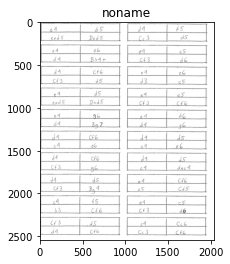

In [421]:
show( img[ 480:2970+52,300:2245+88 ])   #y, x


In [439]:
# show( img[ 480:2970+52,300:2245+88 ])   #y, x
spcw= 82
spch=45

# dx=310
# dy=490

h= (2970+spch-dy)/10
w= (2245+spcw-dx)/2

count= 1
for j in range( 0, 2):
    for i in range( 0, 10):
        x0= int( dx+ w*j)
        x1= int( x0+w-spcw)

        y0= int(dy+i*h)
        y1= int(y0+ h-spch)
        
        fname= 'recorte-'+str( count)+ ".jpg"
        write_image( os.path.join( r"C:\mestrado\datasets\extra-final-test\images--nina-20210130", fname),
                    img[y0:y1,x0:x1])
        count= count+1
        
# show( )

In [10]:
#
# split train valid
#

def split_train_valid( root):
    Path( os.path.join( root, 'train/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'train/labels')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/labels')).mkdir(parents=True, exist_ok=True)
    
    # le arquivos
    print( os.path.join( root, 'labels/*.pgn'))
    files = glob( os.path.join( root, 'labels/*.pgn'))
    print( len( files))
    random.shuffle( files)
    n_train = int(len( files)* .8)

    for i in range( 0, len( files)):
        f= files[i]
        folder= 'train' if i< n_train else 'valid'    
        
        # copia
        dest_file= os.path.join( root, folder, 'labels', Path(f).name)
        shutil.copyfile( f, dest_file)
        shutil.copyfile( 
            f.replace( 'labels', 'images').replace( 'pgn', 'jpg'),                  
            dest_file.replace( 'labels', 'images').replace( 'pgn', 'jpg'))
            

split_train_valid( 'C:/mestrado/repos-github/chess-attention/dataset-builder/datasets/handwritten-only')   
    

C:/mestrado/repos-github/chess-attention/dataset-builder/datasets/handwritten-only\labels/*.pgn
2388
